# Importing Packages 

In [350]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import glob
from datetime import datetime
import geopandas as gpd

# Data Loading and Cleaning

In [320]:
directory = "snap-zip-fns388a-4" 
allFiles = {}; 

for file in glob.glob(directory + '/*.xls'):
    date_obj = datetime.strptime(file.split('/')[1][:-4], "%b %Y")
    print(date_obj) 
    tempDF = pd.read_excel(file, skiprows=3, skipfooter = 2)
    tempDF = tempDF.replace('  ', pd.NA)
    tempDF = tempDF.fillna(0)
    
    for column in tempDF: 
        if 'Unnamed' in column:
            tempDF = tempDF.drop(columns = [column])
        
    tempDF[list(tempDF.columns[1:])] = tempDF[list(tempDF.columns[1:])].apply(pd.to_numeric)
    allFiles[date_obj] = (tempDF)

for file in glob.glob(directory + '/*.xlsx'):
    if '$' not in file: 
        print(file.split('/')[1])
        print(len(file.split('/')[1]))
        if len(file.split('/')[1][:-5]) > 8: 
            date_obj = datetime.strptime(file.split('/')[1][:-5], "%B %Y")
        else:
            date_obj = datetime.strptime(file.split('/')[1][:-5], "%b %Y")
        print(date_obj) 
        tempDF = pd.read_excel(file, skiprows=3, skipfooter = 2)
        tempDF = tempDF.replace('  ', pd.NA)
        tempDF = tempDF.fillna(0)
        
        for column in tempDF: 
            if 'Unnamed' in column:
                tempDF = tempDF.drop(columns = [column])
            
        tempDF[list(tempDF.columns[1:])] = tempDF[list(tempDF.columns[1:])].apply(pd.to_numeric)
        allFiles[date_obj] = (tempDF)

2003-01-01 00:00:00
2017-01-01 00:00:00
2016-01-01 00:00:00
2002-01-01 00:00:00
2014-01-01 00:00:00
2000-01-01 00:00:00
2019-07-01 00:00:00
2018-07-01 00:00:00
2001-01-01 00:00:00
2015-01-01 00:00:00
2008-07-01 00:00:00
2011-01-01 00:00:00
2005-01-01 00:00:00
2004-01-01 00:00:00
2010-01-01 00:00:00
2009-07-01 00:00:00
2006-01-01 00:00:00
2012-01-01 00:00:00
2013-01-01 00:00:00
2007-01-01 00:00:00
1996-07-01 00:00:00
1997-07-01 00:00:00
1995-07-01 00:00:00
1998-01-01 00:00:00
1999-01-01 00:00:00
1994-07-01 00:00:00
1989-01-01 00:00:00
1990-07-01 00:00:00
1991-07-01 00:00:00
1993-07-01 00:00:00
1992-07-01 00:00:00
1992-01-01 00:00:00
1993-01-01 00:00:00
1991-01-01 00:00:00
1989-07-01 00:00:00
1990-01-01 00:00:00
1999-07-01 00:00:00
1994-01-01 00:00:00
1995-01-01 00:00:00
1998-07-01 00:00:00
1997-01-01 00:00:00
1996-01-01 00:00:00
2013-07-01 00:00:00
2007-07-01 00:00:00
2006-07-01 00:00:00
2012-07-01 00:00:00
2004-07-01 00:00:00
2021-01-01 00:00:00
2010-07-01 00:00:00
2009-01-01 00:00:00


In [321]:
allFilesList = sorted(allFiles.items(), reverse = False) 

newList = {}

for item in allFilesList:
    newList[item[0]] = item[1]

In [322]:
def split_name(name):
    return pd.Series([name[0:2], name[2:]])

for key in newList.keys():
    newDF = newList[key]['Substate/Region'].str.split(" ", expand=True)

    columnDict = {}
    for columnName in newDF.columns:
        columnDict[columnName] = "EXPANDED_ID_" + str(columnName)
        
    newDF = newDF.rename(mapper=columnDict, axis=1)
    newDF[['STATE_ID', 'EXPANDED_ID_0']] = newDF['EXPANDED_ID_0'].apply(split_name)
    #newDF['STATE_ID'] = pd.to_numeric(newDF['STATE_ID'], errors = "coerce")
    newList[key] = pd.concat([newDF, newList[key]], axis=1)

In [323]:
newList[list(newList.keys())[0]]

EXPANDED_ID_0 EXPANDED_ID_1 EXPANDED_ID_2 EXPANDED_ID_3 EXPANDED_ID_4  \
0            00101            AL           FSP       AUTAUGA            CO   
1            00301            AL           FSP       BALDWIN            CO   
2            00501            AL           FSP       BARBOUR            CO   
3            00701            AL           FSP          BIBB            CO   
4            00901            AL           FSP        BLOUNT            CO   
...            ...           ...           ...           ...           ...   
2834         14701            WI           FSP           RED         CLIFF   
2835         14901            WI           FSP           BAD         RIVER   
2836         15101            WI           FSP           LAC            DU   
2837         00002            WY           FSP       WYOMING            SD   
2838            S.       Summary          None          None          None   

     EXPANDED_ID_5 EXPANDED_ID_6 EXPANDED_ID_7 EXPANDED_ID_8 EXPANDED_ID_9  \
0               FS           OFF          None          None          None   
1               FS           OFF          None          None          None   
2               FS           OFF          None          None          None   
3               FS           OFF          None          None          None   
4               FS           OFF          None          None          None   
...            ...           ...           ...           ...           ...   
2834        TRIBAL         COUNC          None          None          None   
2835        TRIBAL         COUNC          None          None          None   
2836      FLAMBEAU        TRIBAL          None          None          None   
2837          PASS          None          None          None          None   
2838          None          None          None          None          None   

      ... EXPANDED_ID_13 STATE_ID                        Substate/Region  \
0     ...           None       01       0100101 AL FSP AUTAUGA CO FS OFF   
1     ...           None       01       0100301 AL FSP BALDWIN CO FS OFF   
2     ...           None       01       0100501 AL FSP BARBOUR CO FS OFF   
3     ...           None       01          0100701 AL FSP BIBB CO FS OFF   
4     ...           None       01        0100901 AL FSP BLOUNT CO FS OFF   
...   ...            ...      ...                                    ...   
2834  ...           None       55  5514701 WI FSP RED CLIFF TRIBAL COUNC   
2835  ...           None       55  5514901 WI FSP BAD RIVER TRIBAL COUNC   
2836  ...           None       55  5515101 WI FSP LAC DU FLAMBEAU TRIBAL   
2837  ...           None       56         5600002 WY FSP WYOMING SD PASS   
2838  ...           None       U.                           U.S. Summary   

     SNAP All Persons Public Assistance Participation  \
0                                              1634.0   
1                                              2248.0   
2                                              2588.0   
3                                               856.0   
4                                              1364.0   
...                                               ...   
2834                                            242.0   
2835                                            254.0   
2836                                            396.0   
2837                                          13765.0   
2838                                       10033430.0   

     SNAP All Persons Non-Public Assistance Participation  \
0                                                  2066     
1                                                  3018     
2                                                  2339     
3                                                  1260     
4                                                  1264     
...                                                 ...     
2834                                                101     
2835                                         

In [324]:
geo_df = gpd.read_file("cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
geo_df.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry  
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...  
4  POLYGON ((-82.64320 38.16909, -82.64300 38.169...

In [483]:
laterData = pd.read_csv("nst-est2020-alldata.csv")
earlierData = pd.read_csv("st-est00int-hisp.csv")
earlierData = earlierData.drop(columns = ['POPESTIMATE2010'])

earlierData = earlierData.loc[earlierData['ORIGIN'] == 0]

mergedData = pd.merge(left=earlierData, right=laterData, how='left', left_on='STATE', right_on='STATE')

In [484]:
earlierData

REGION  DIVISION  STATE                  NAME  ORIGIN  ESTIMATESBASE2000  \
0         0         0      0         United States       0          281424600   
3         3         6      1               Alabama       0            4447207   
6         4         9      2                Alaska       0             626933   
9         4         8      4               Arizona       0            5130247   
12        3         7      5              Arkansas       0            2673293   
15        4         9      6            California       0           33871653   
18        4         8      8              Colorado       0            4302086   
21        1         1      9           Connecticut       0            3405650   
24        3         5     10              Delaware       0             783559   
27        3         5     11  District of Columbia       0             572086   
30        3         5     12               Florida       0           15982571   
33        3         5     13               Georgia       0            8186653   
36        4         9     15                Hawaii       0            1211497   
39        4         8     16                 Idaho       0            1293957   
42        2         3     17              Illinois       0           12419927   
45        2         3     18               Indiana       0            6080827   
48        2         4     19                  Iowa       0            2926538   
51        2         4     20                Kansas       0            2688925   
54        3         6     21              Kentucky       0            4042193   
57        3         7     22             Louisiana       0            4469035   
60        1         1     23                 Maine       0            1274779   
63        3         5     24              Maryland       0            5296647   
66        1         1     25         Massachusetts       0            6349364   
69        2         3     26              Michigan       0            9938823   
72        2         4     27             Minnesota       0            4919631   
75        3         6     28           Mississippi       0            2844754   
78        2         4     29              Missouri       0            5596564   
81        4         8     30               Montana       0             902200   
84        2         4     31              Nebraska       0            1711230   
87        4         8     32                Nevada       0            1998250   
90        1         1     33         New Hampshire       0            1235807   
93        1         2     34            New Jersey       0            8414764   
96        4         8     35            New Mexico       0            1819017   
99        1         2     36              New York       0           18977026   
102       3         5     37        North Carolina       0            8046346   
105       2         4     38          North Dakota       0             642237   
108       2         3     39                  Ohio       0           11353336   
111       3         7     40              Oklahoma       0            3450451   
114       4         9     41                Oregon       0            3421524   
117       1         2     42          Pennsylvania       0           12280548   
120       1         1     44          Rhode Island       0            1048259   
123       3         5     45        South Carolina       0            4012023   
126       2         4     46          South Dakota       0             754858   
129       3         6     47             Tennessee       0            5689427   
132       3         7     48                 Texas       0           20851028   
135       4         8     49                  Utah       0            2233183   
138       1         1     50               Vermont       0             608613   
141       3         5     51              Virginia       0            7079057   
144       4         9     53        

In [485]:
for column in mergedData:
    if column != "STATE" and 'POPESTIMATE' not in column:
        mergedData = mergedData.drop(column, axis = 1)

# Data Visualization

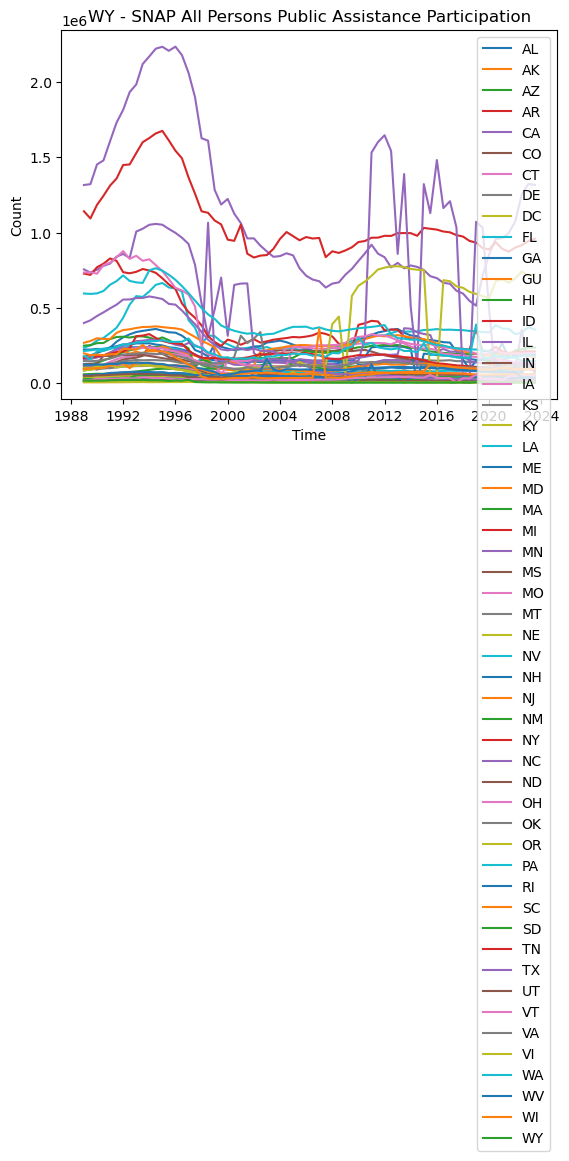

In [325]:
ColumnToVisualize = 'SNAP All Persons Public Assistance Participation'
states = newList[list(newList.keys())[69]]["EXPANDED_ID_1"].unique()
states = states[:-1]
dates = list(newList.keys())

for state in states: 
    counts = []
    for date in dates:
        currentDF = newList[date][newList[date]["EXPANDED_ID_1"] == state]
        counts.append(sum(currentDF[ColumnToVisualize])) 
    
    plt.plot(dates, counts, label = state)


plt.title(state + " - " + ColumnToVisualize)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

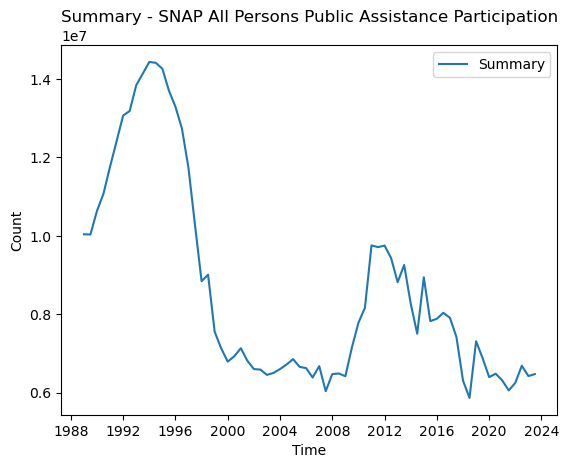

In [326]:
ColumnToVisualize = 'SNAP All Persons Public Assistance Participation'
state = "Summary" # Nationwide SNAP participation

counts = []

for date in dates:
    currentDF = newList[date][newList[date]["EXPANDED_ID_1"] == state]
    counts.append(sum(currentDF[ColumnToVisualize])) 

plt.plot(dates, counts, label = state)


plt.title(state + " - " + ColumnToVisualize)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()

In [511]:
AttributeToVisualize = 'SNAP All Persons Public Assistance Participation'
dates = list(newList.keys())

heatmapDF = newList[date][['STATE_ID', AttributeToVisualize]][:-1]

heatmapDF = heatmapDF.groupby(by='STATE_ID').sum()

     STATE_ID  SNAP All Persons Public Assistance Participation
0          01                                               991
1          01                                              1922
2          01                                               819
3          01                                               502
4          01                                               836
...       ...                                               ...
2637       55                                                22
2638       55                                                59
2639       55                                                11
2640       55                                                 5
2641       56                                               594

[2642 rows x 2 columns]


In [498]:
merged_df = pd.merge(left=geo_df, right=heatmapDF, how='left', left_on='STATEFP', right_on='STATE_ID')
merged_df['STATEFP'] = merged_df['STATEFP'].astype(int)
merged_df = pd.merge(left=merged_df, right=mergedData, how='left', left_on='STATEFP', right_on='STATE')

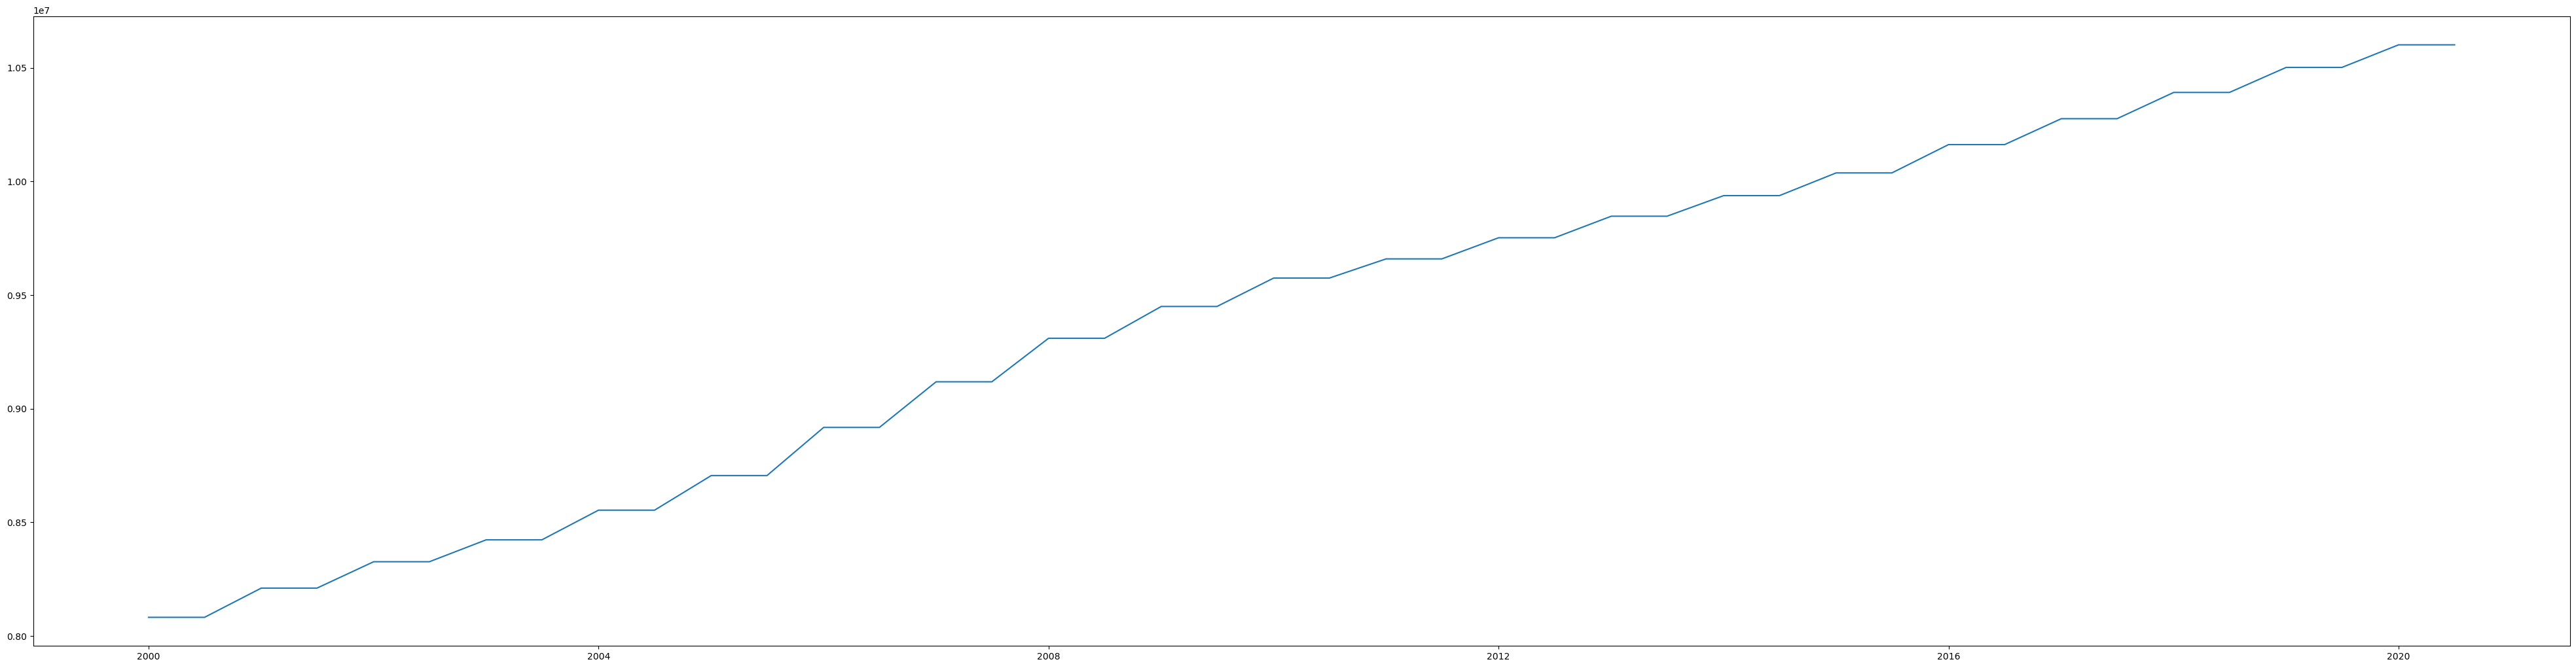

In [505]:
yaxisData = [] 
for date in newDate: 
    yaxisData.append(merged_df['POPESTIMATE' + str(date.year)][1])

plt.plot(newDate, yaxisData)

/var/folders/_x/3gwpfcn92dncqz0cw4kmf48m0000gn/T/ipykernel_86259/867797676.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1)


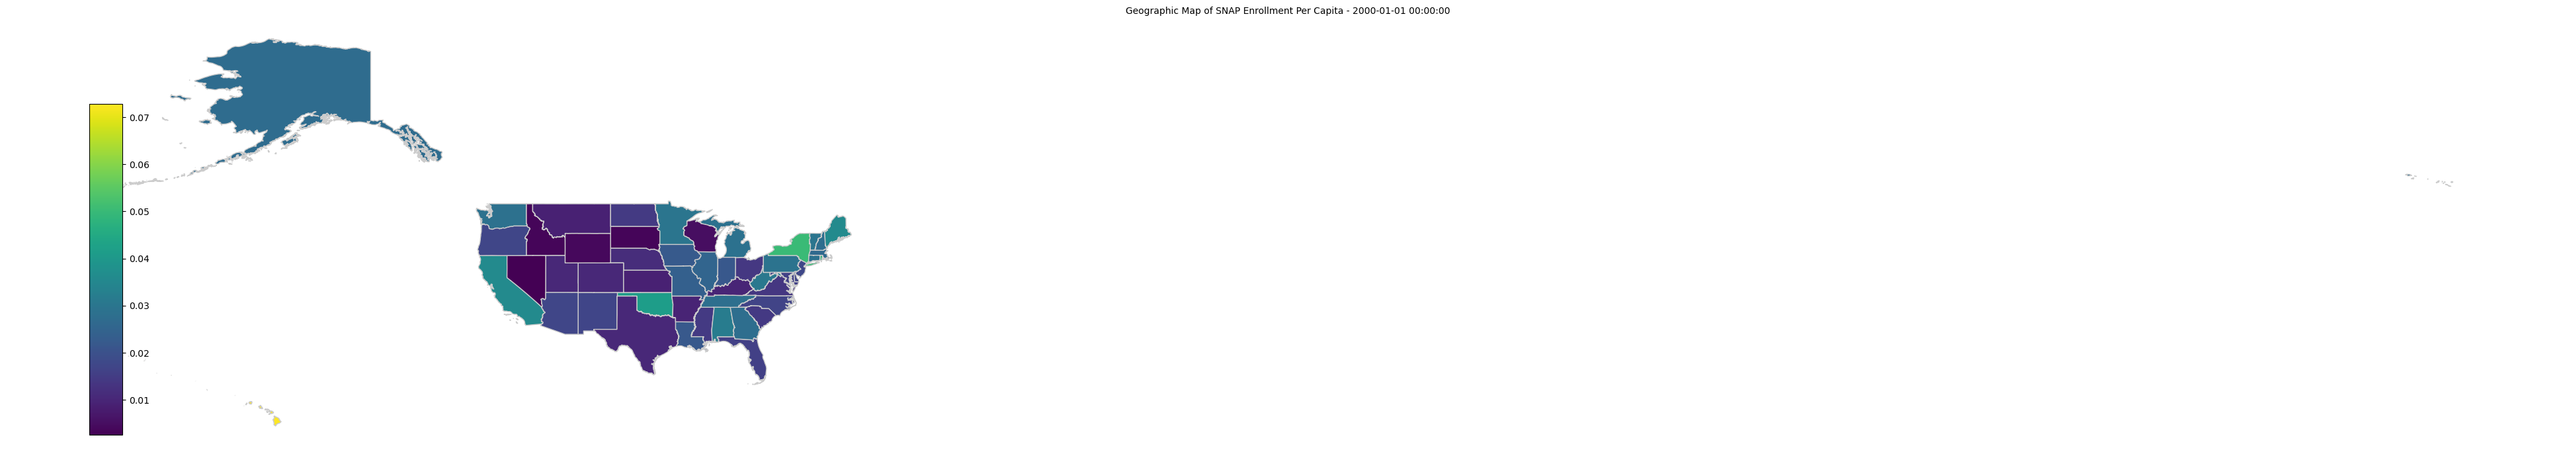

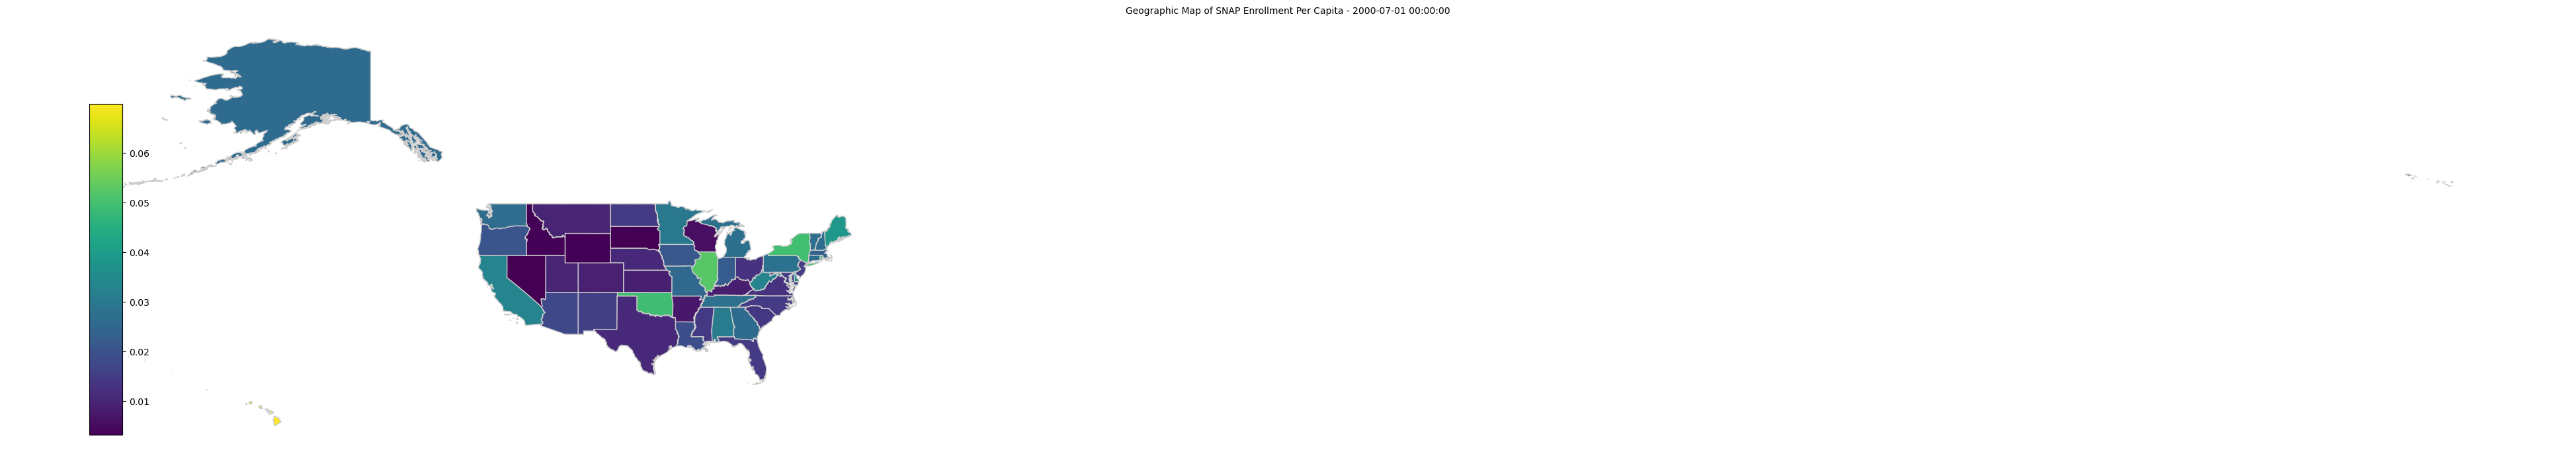

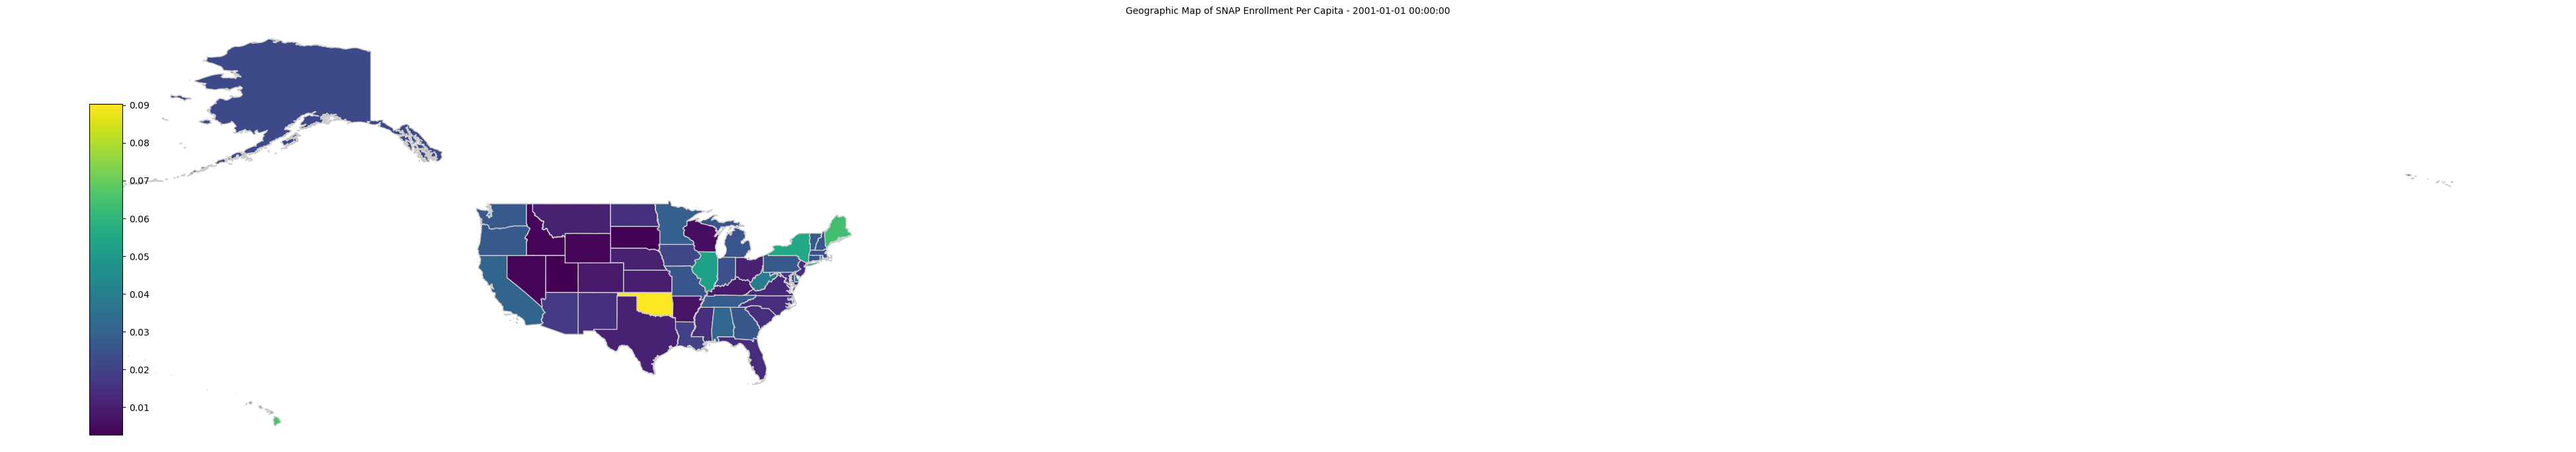

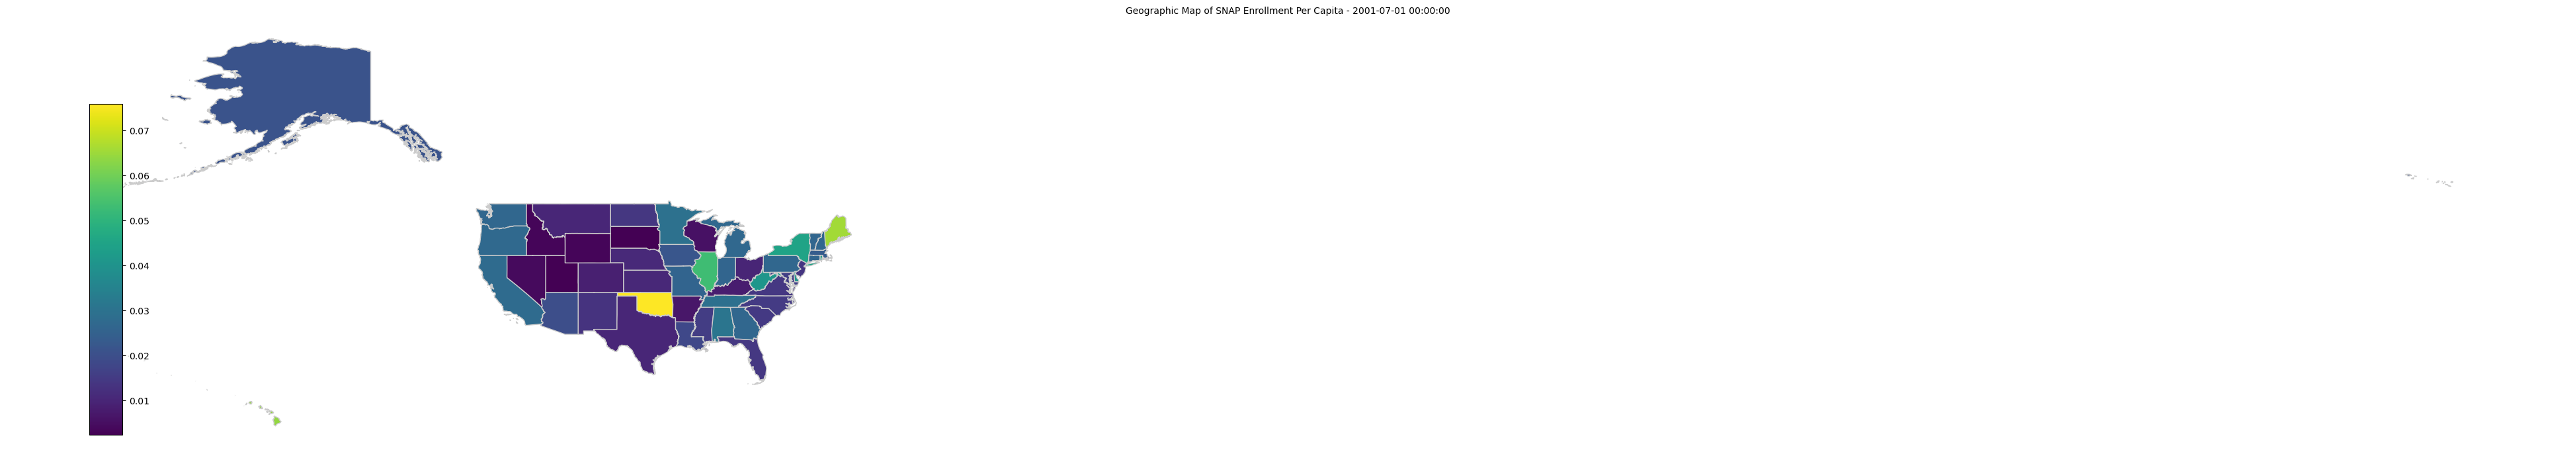

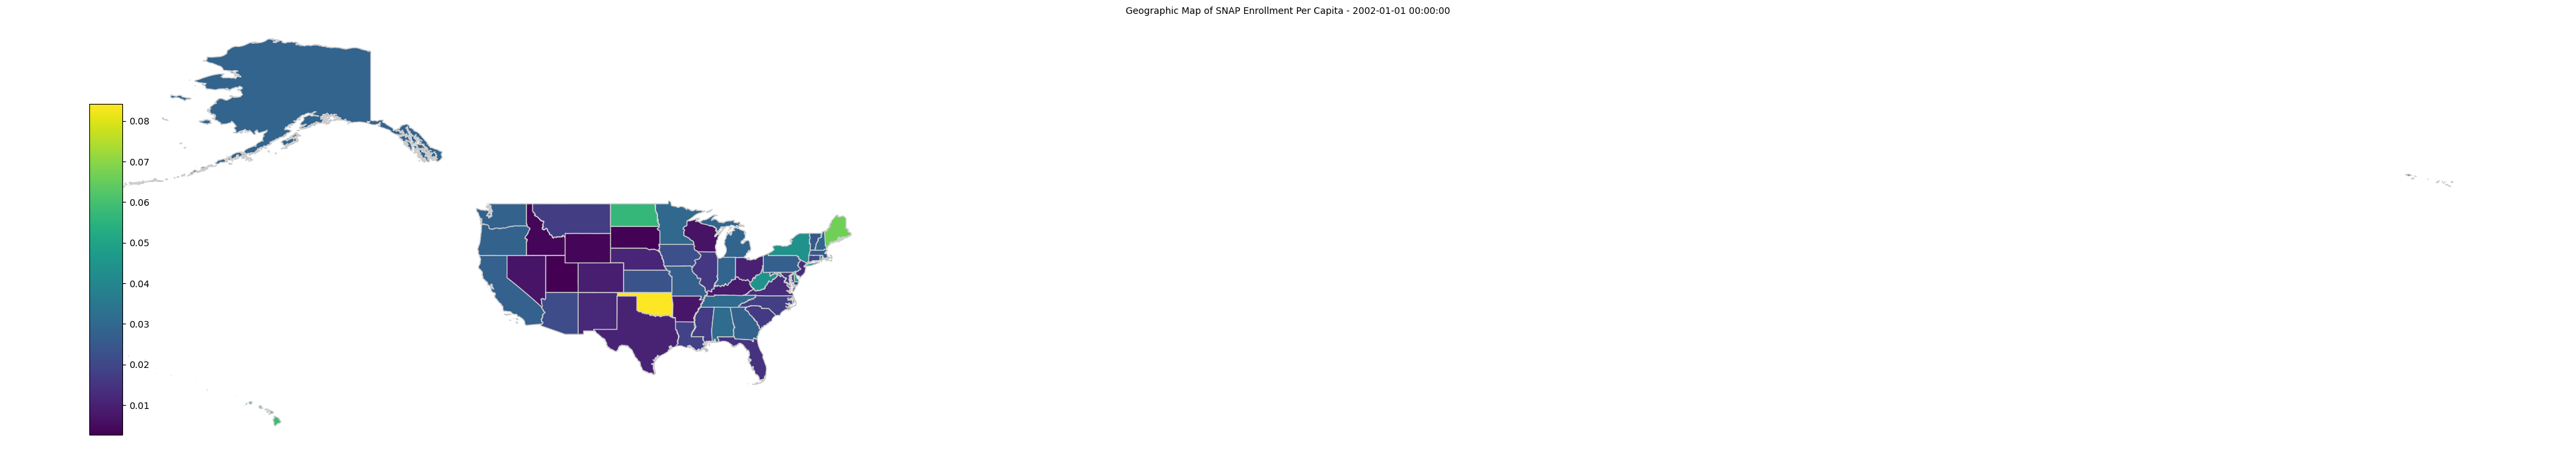

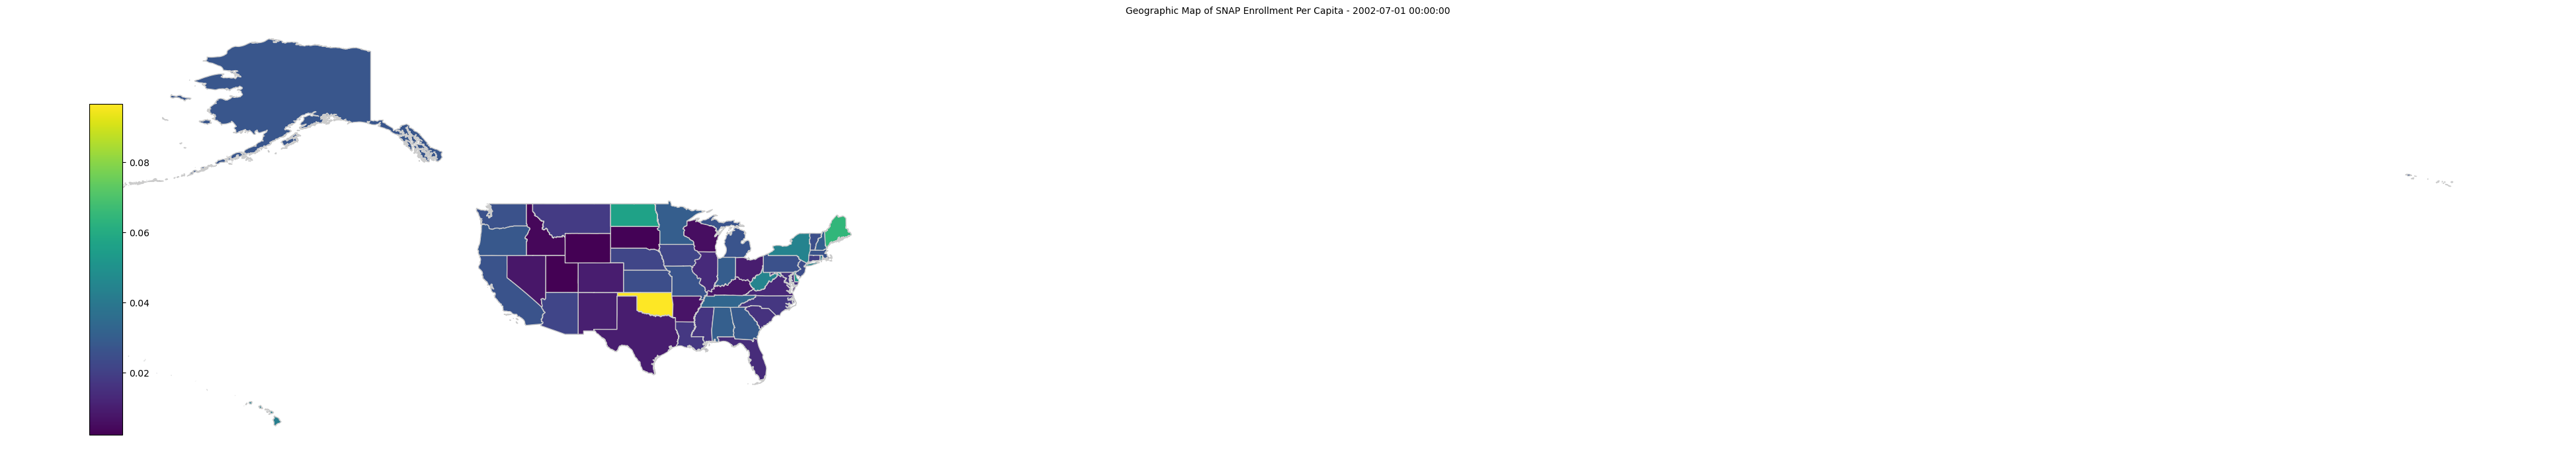

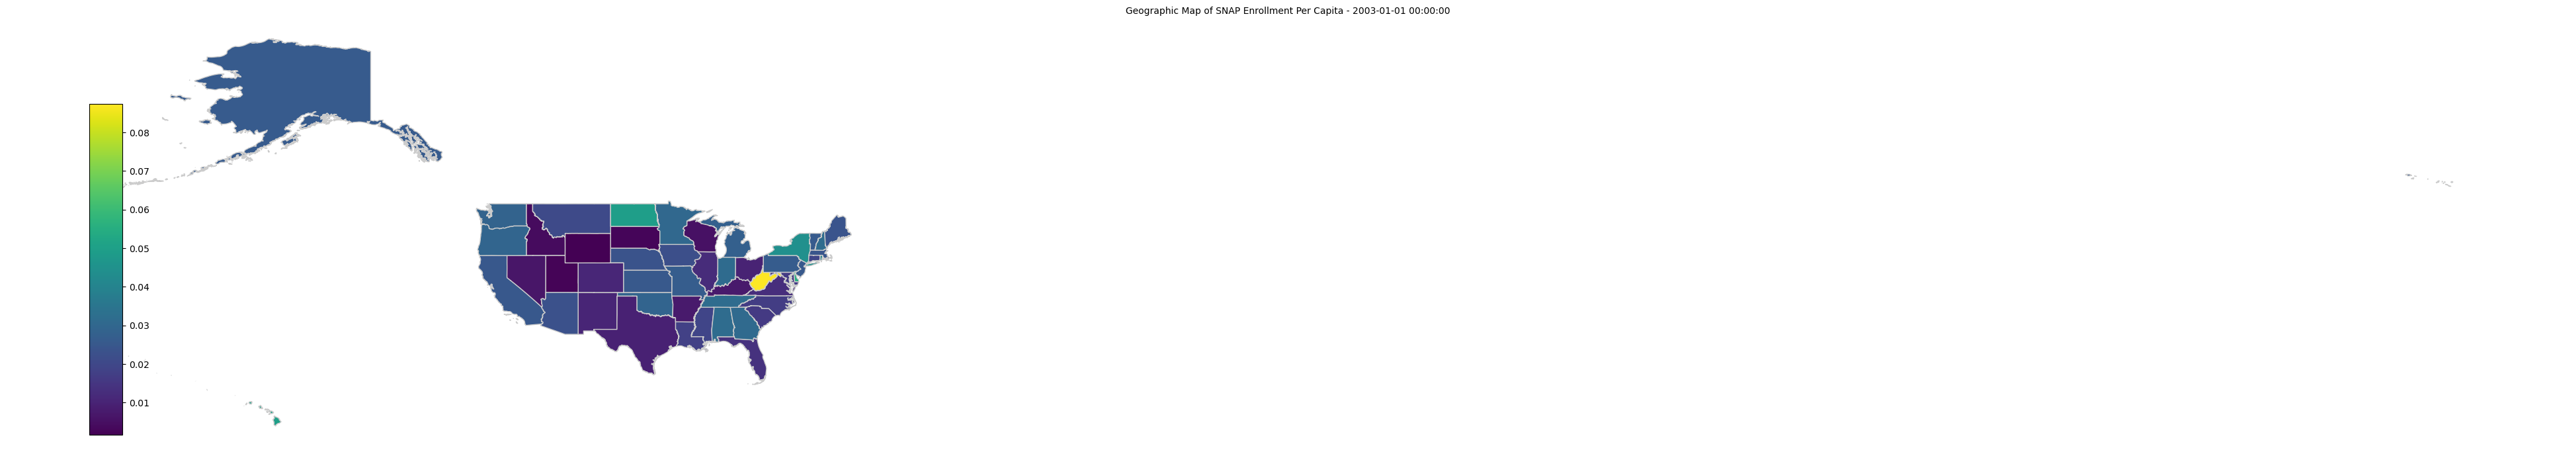

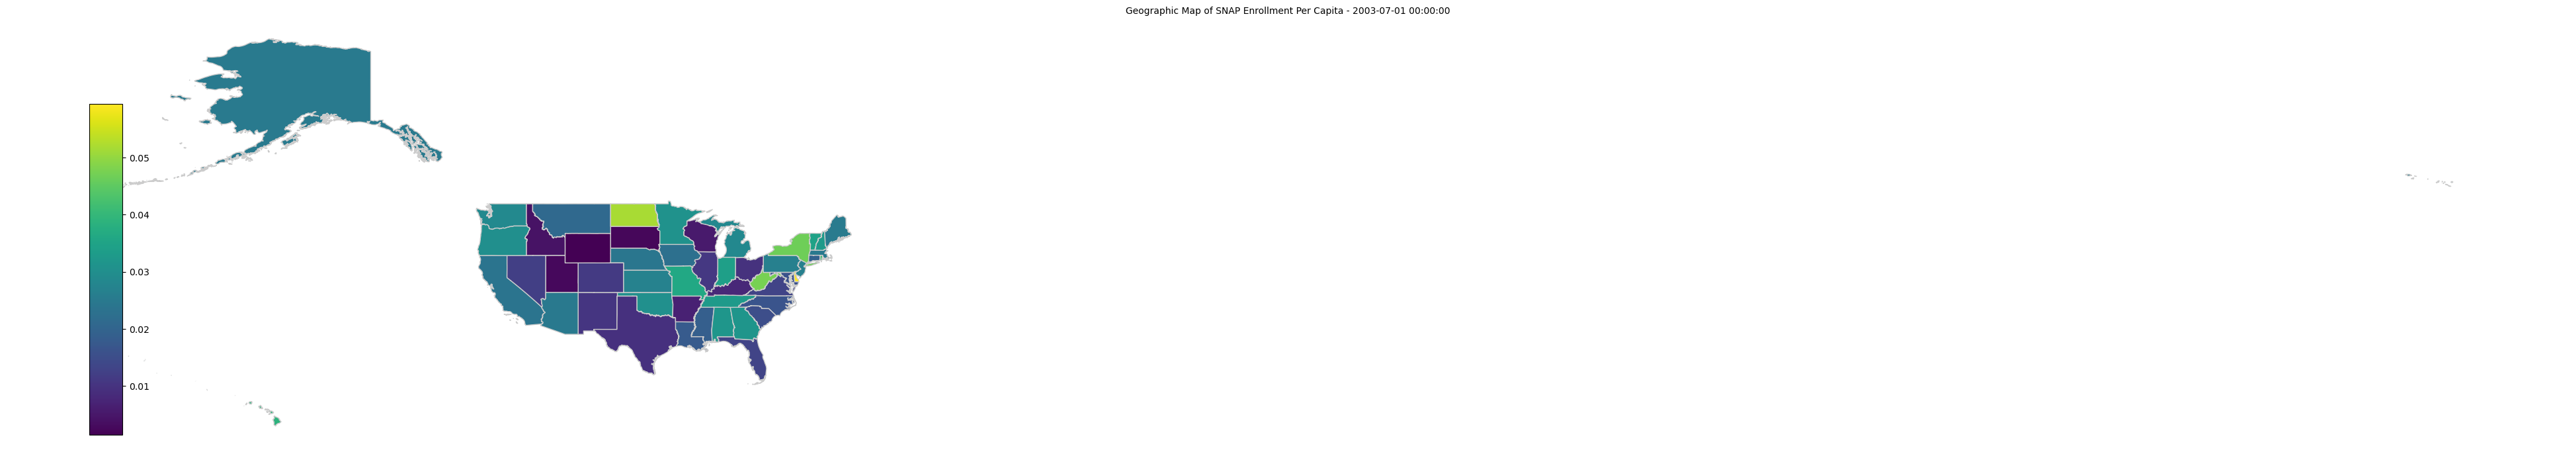

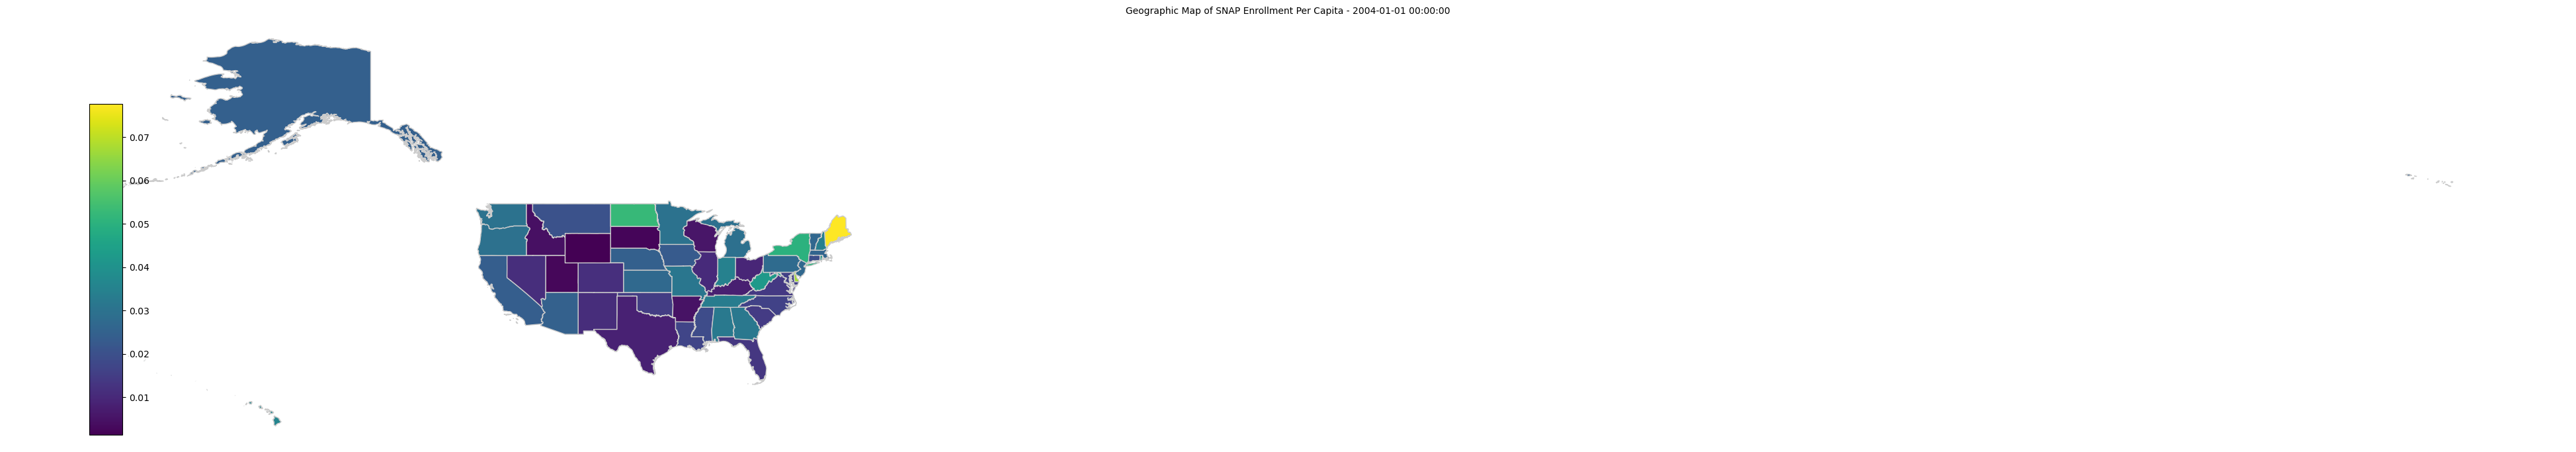

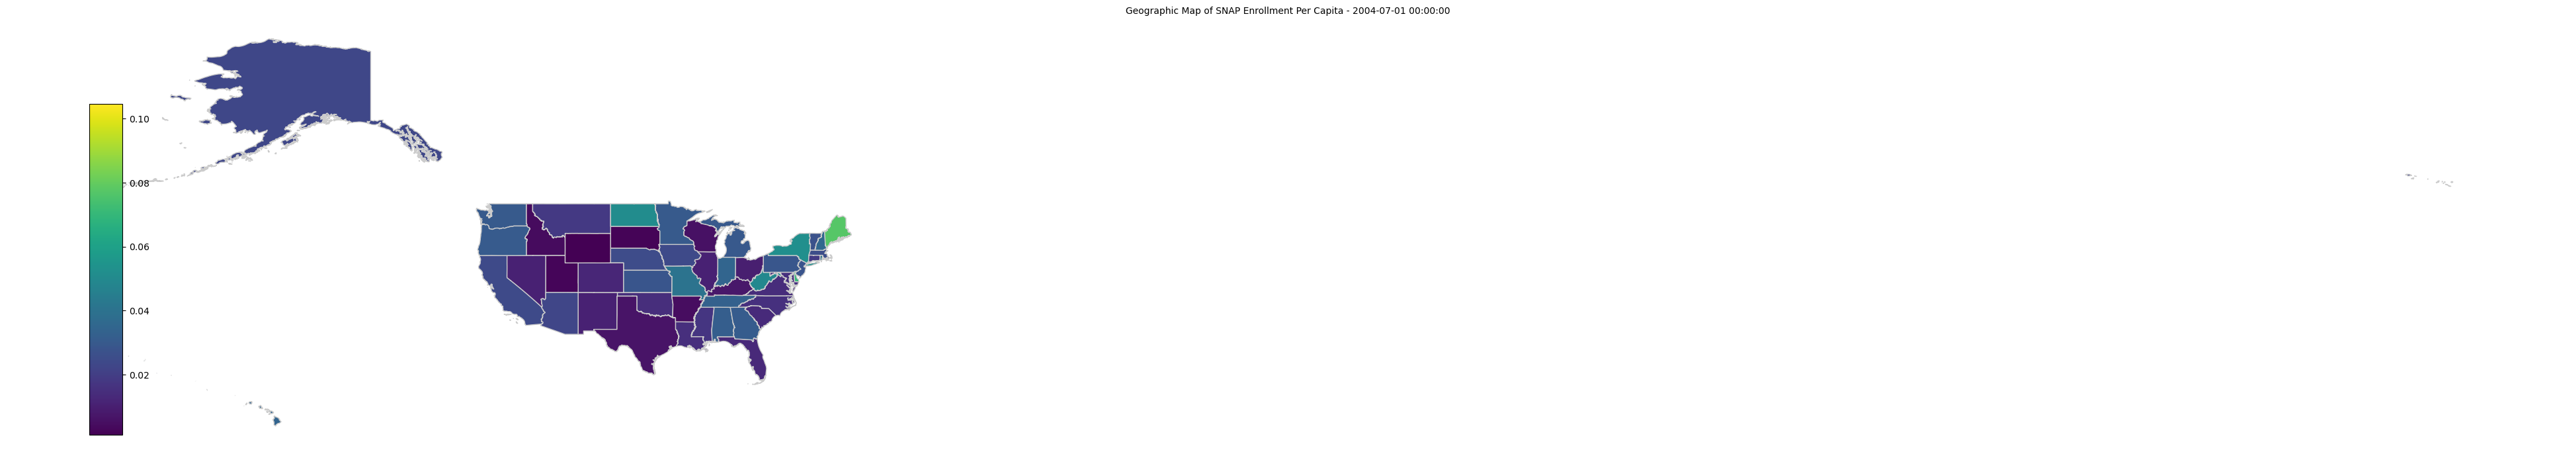

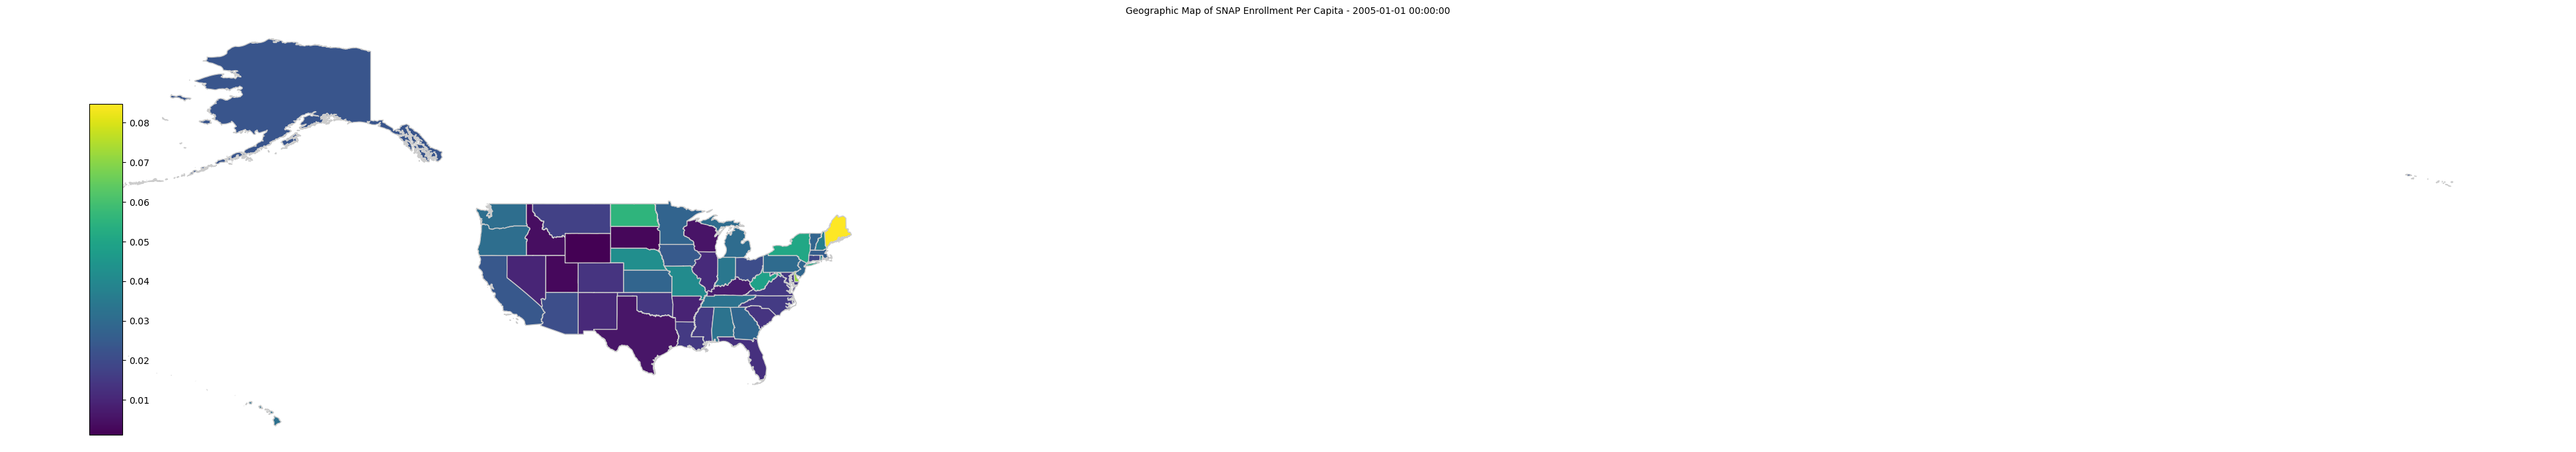

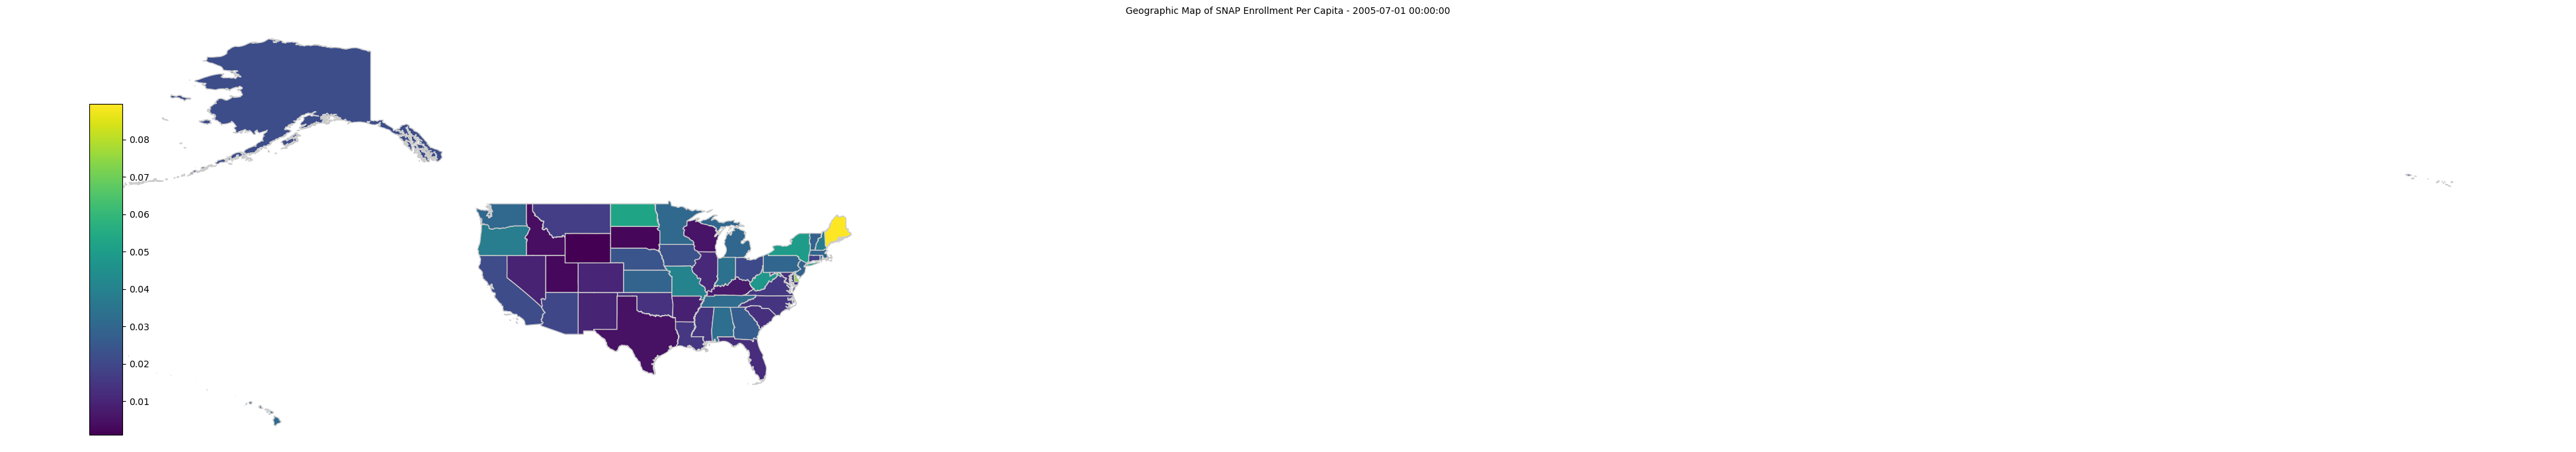

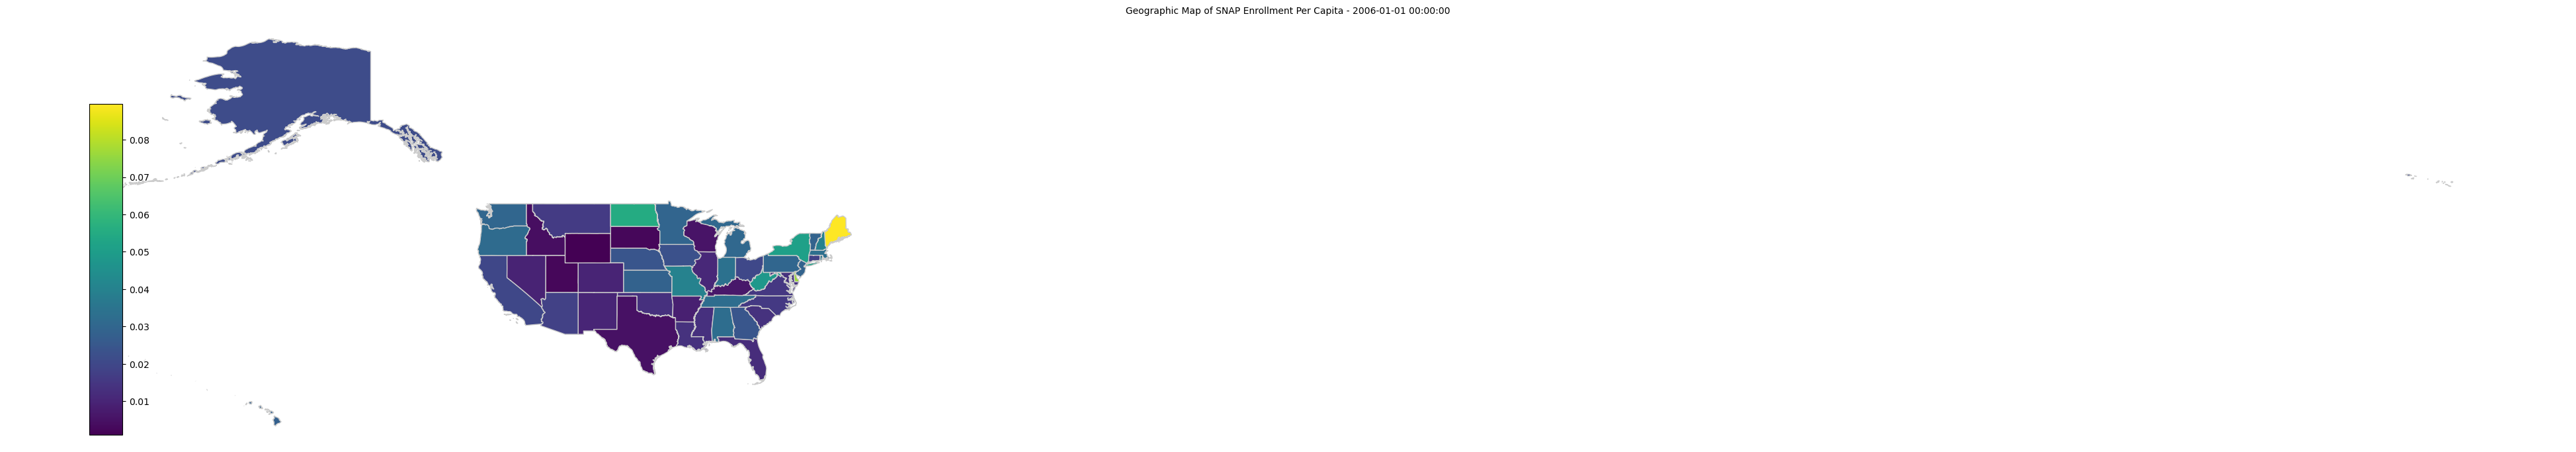

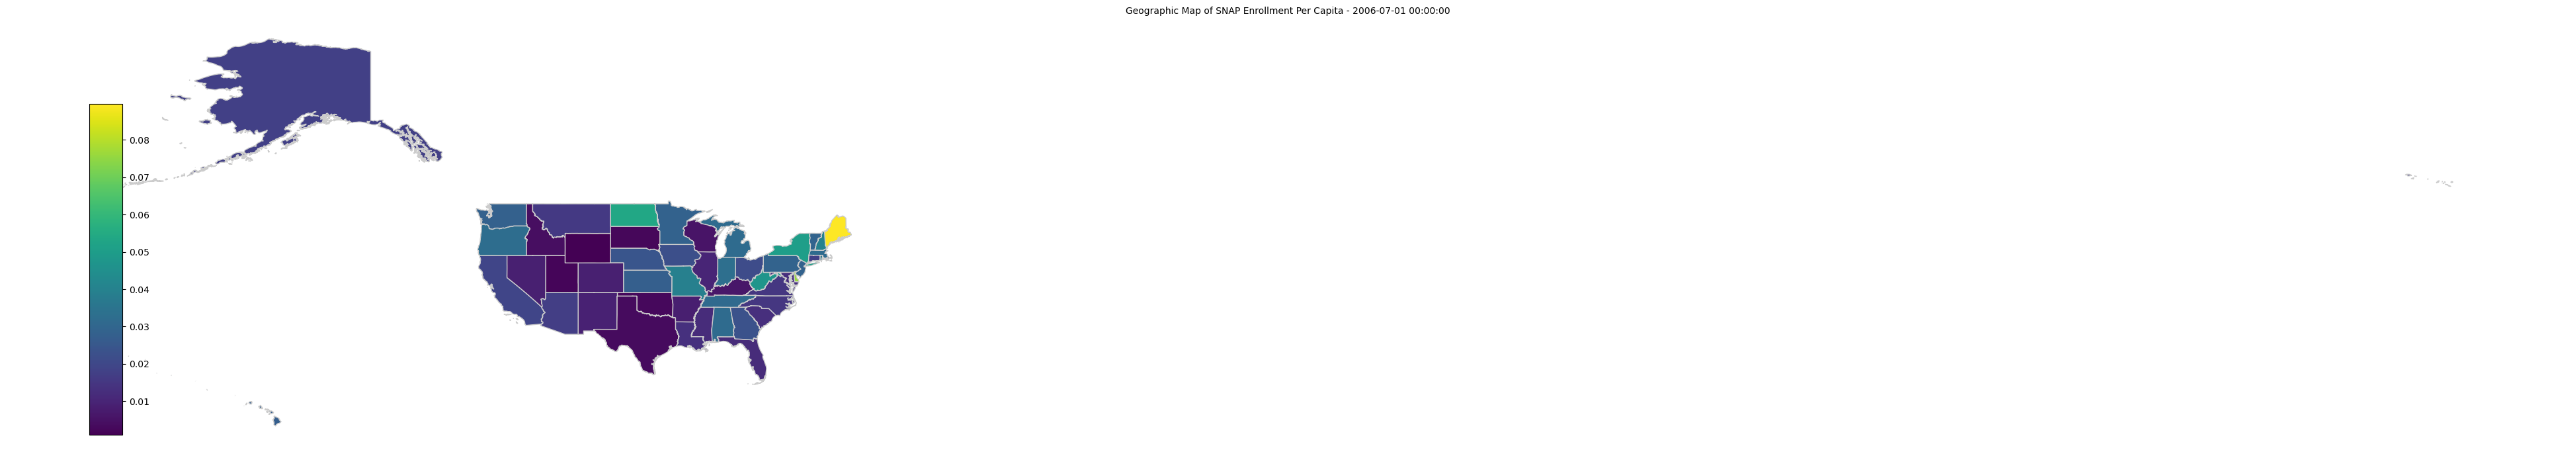

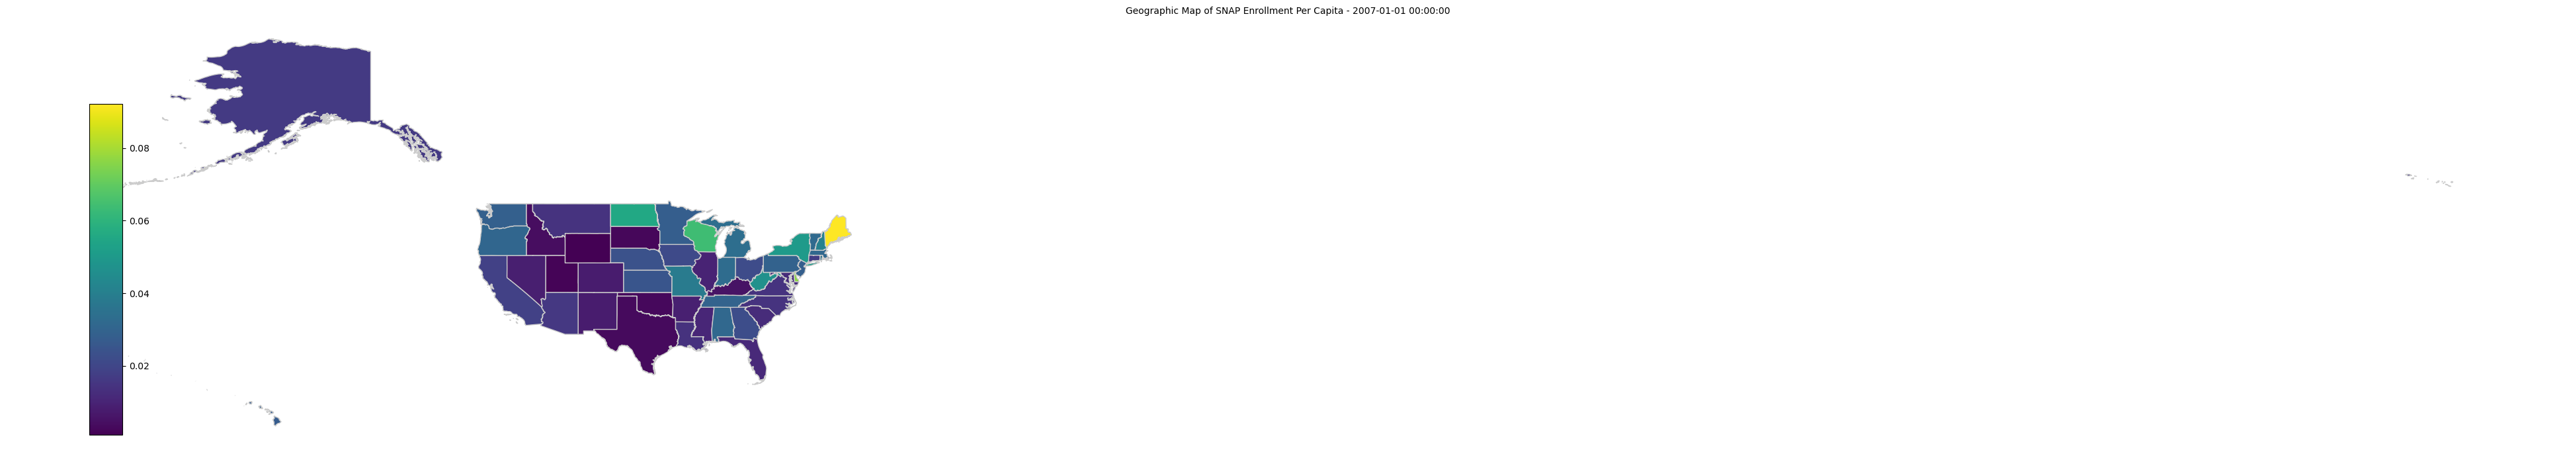

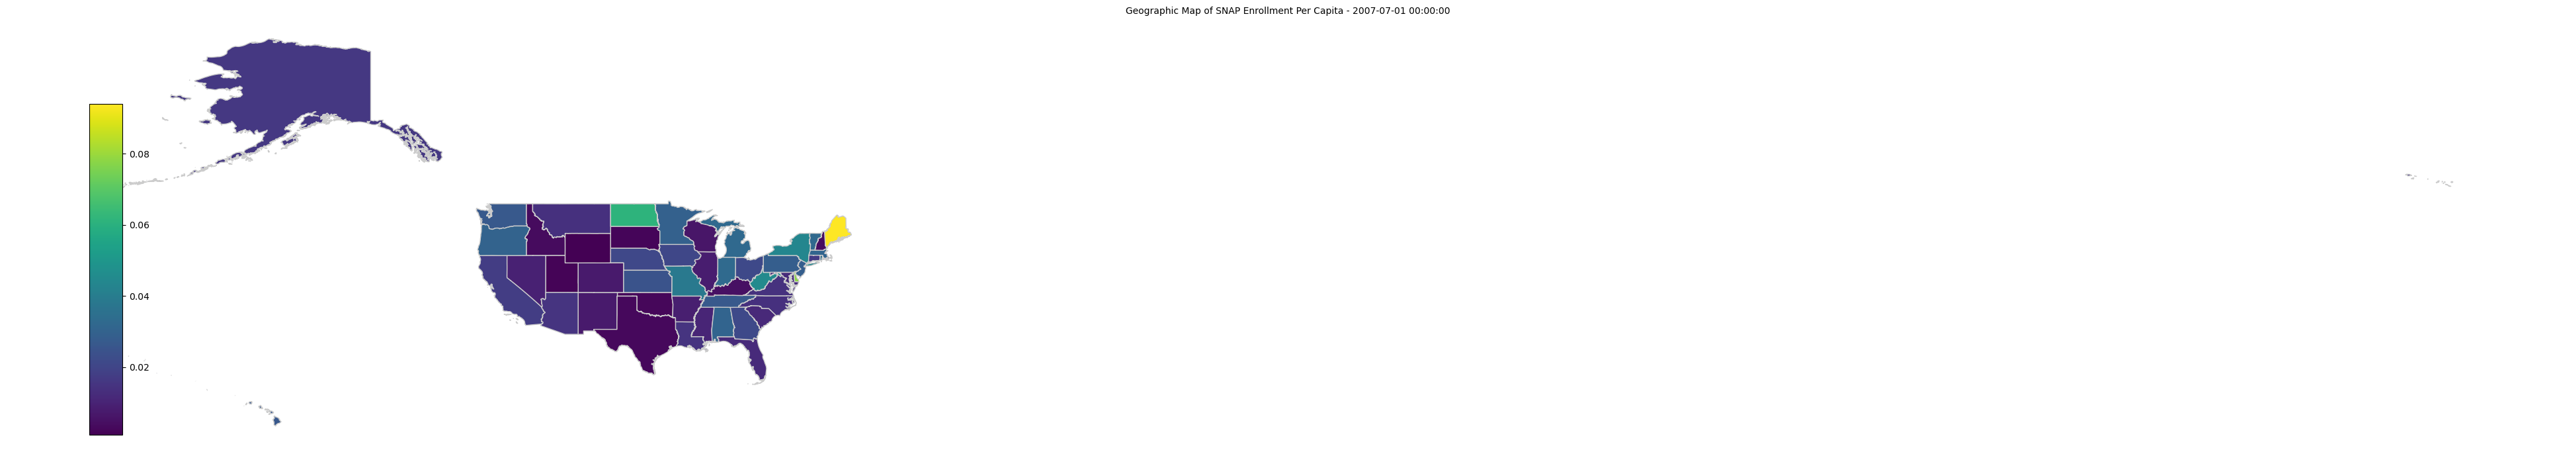

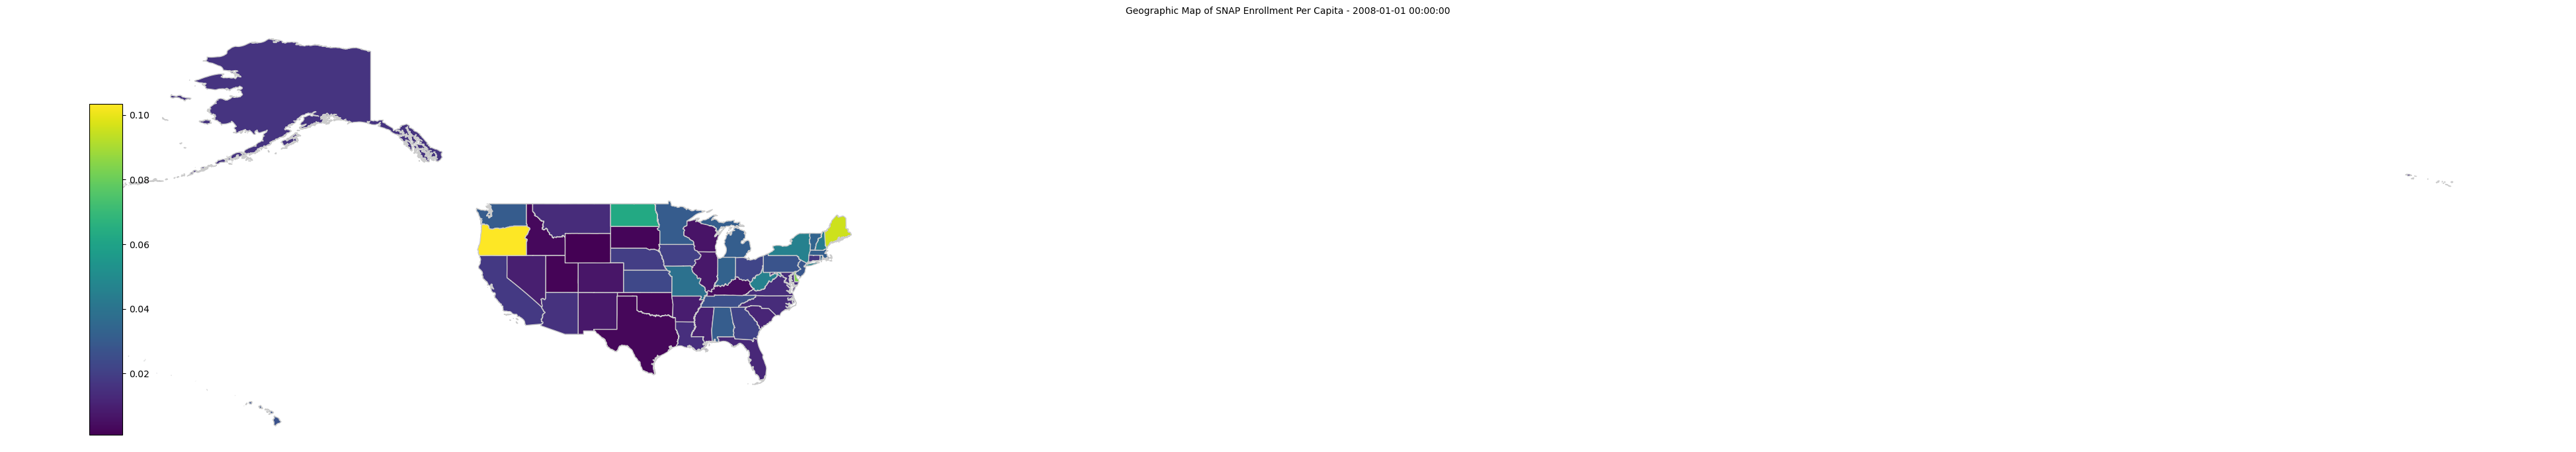

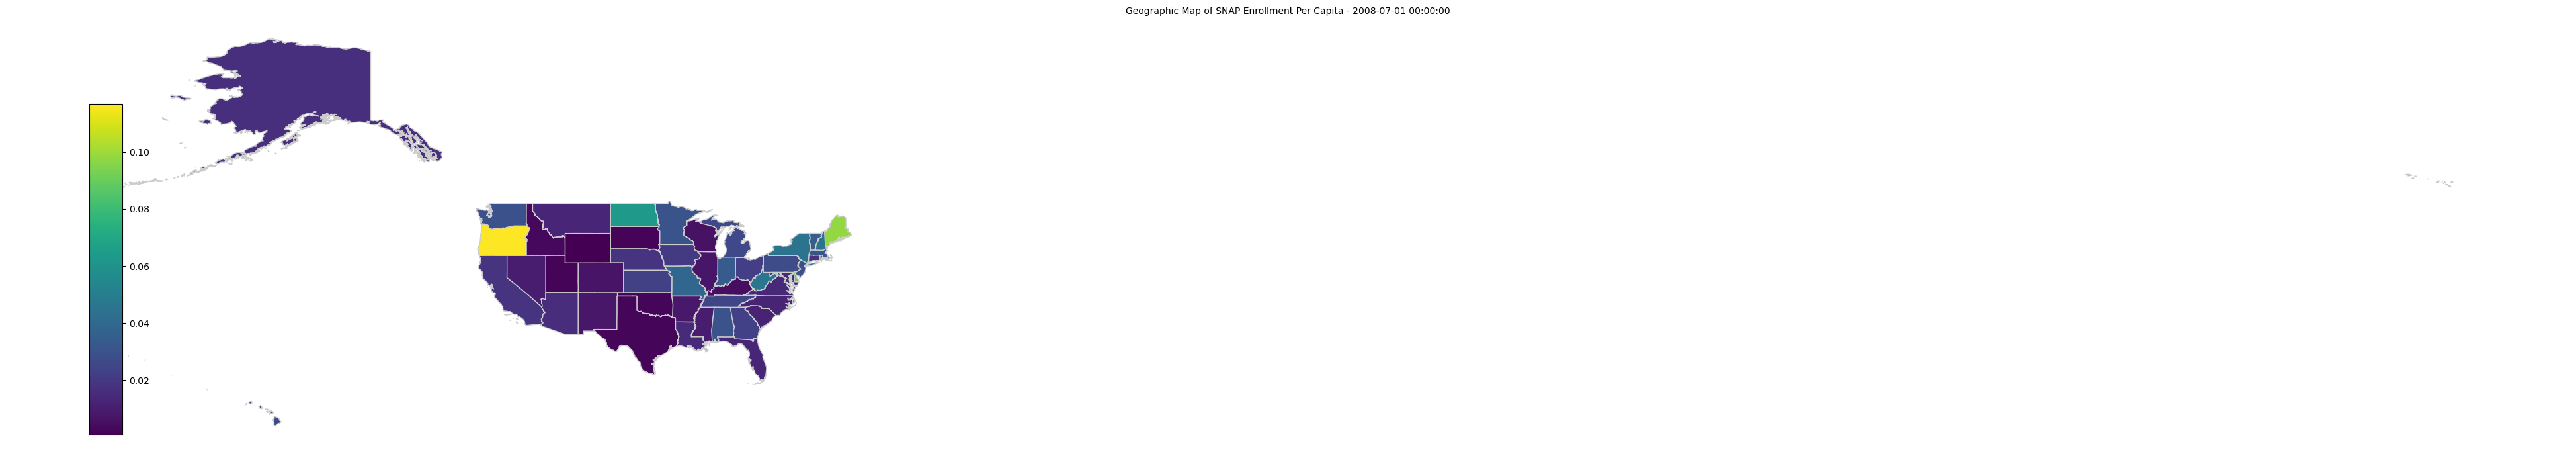

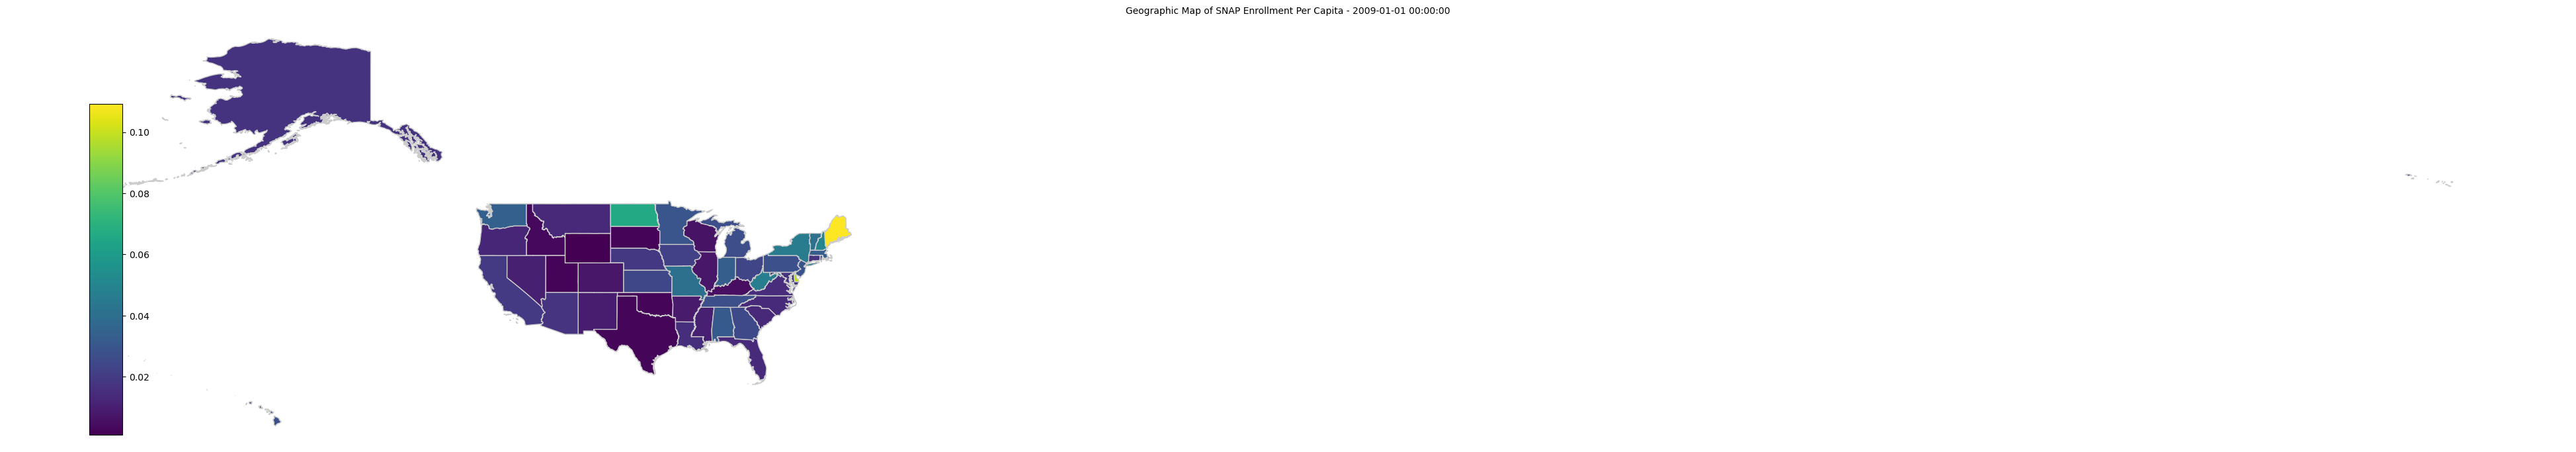

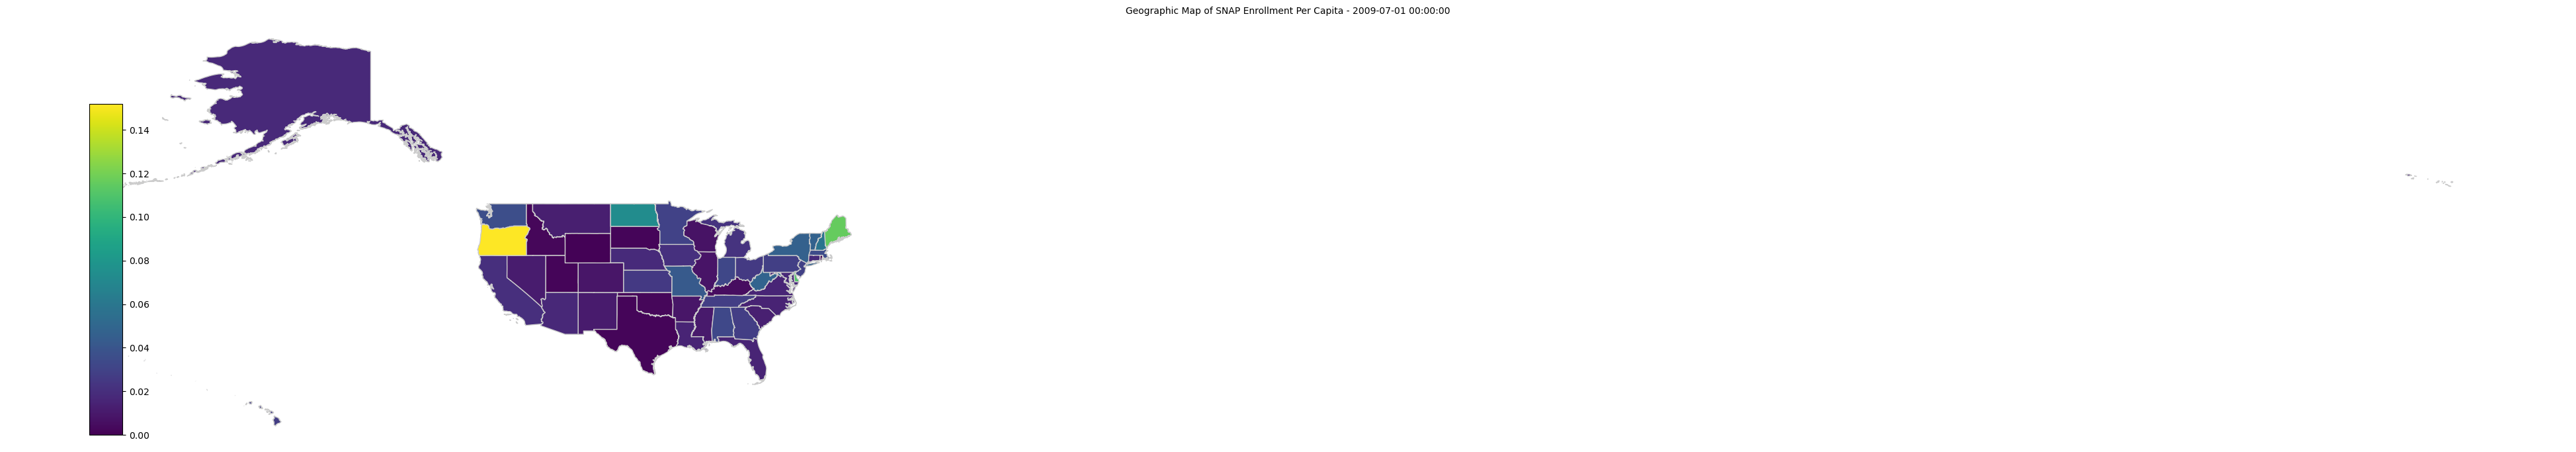

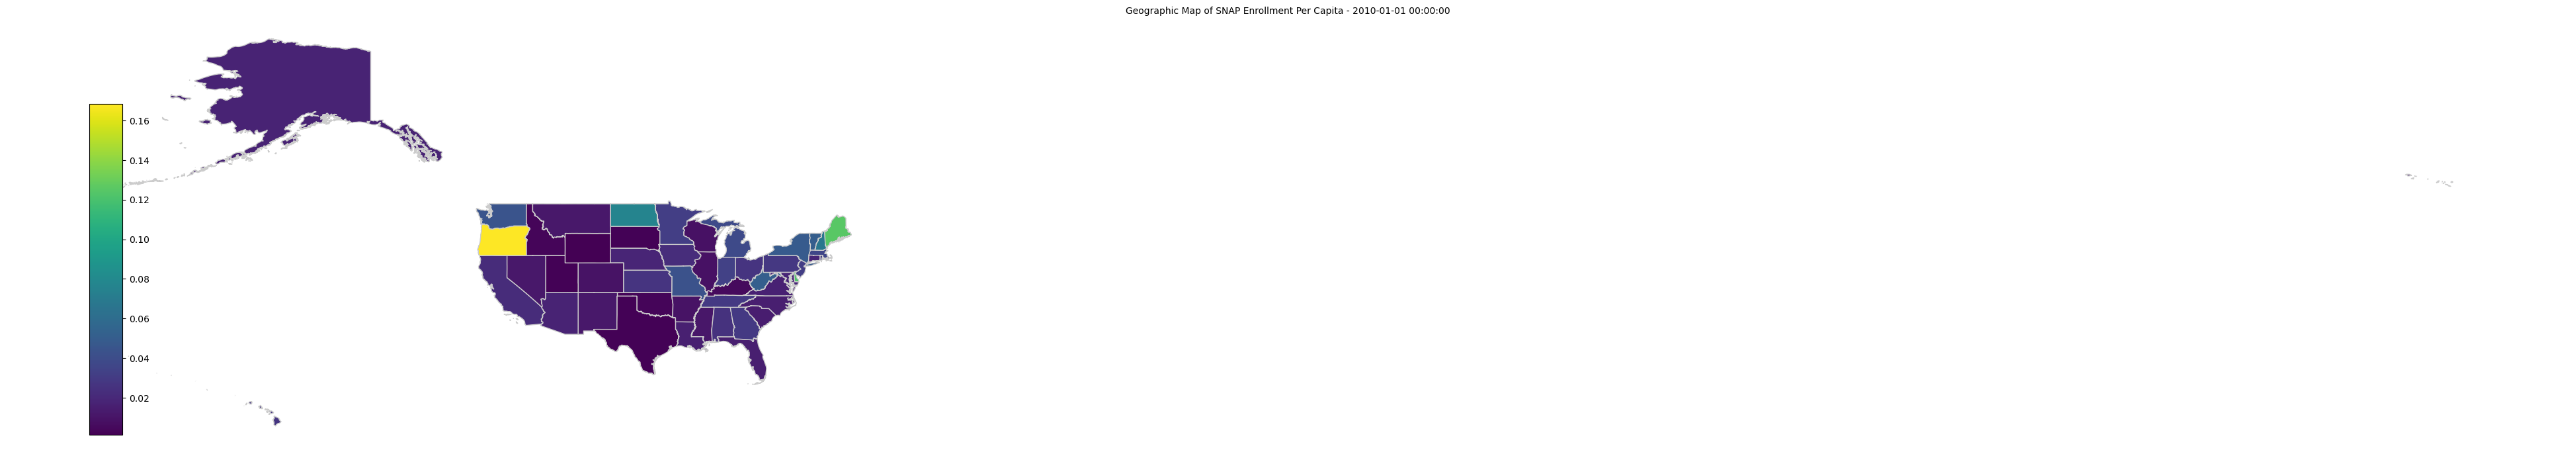

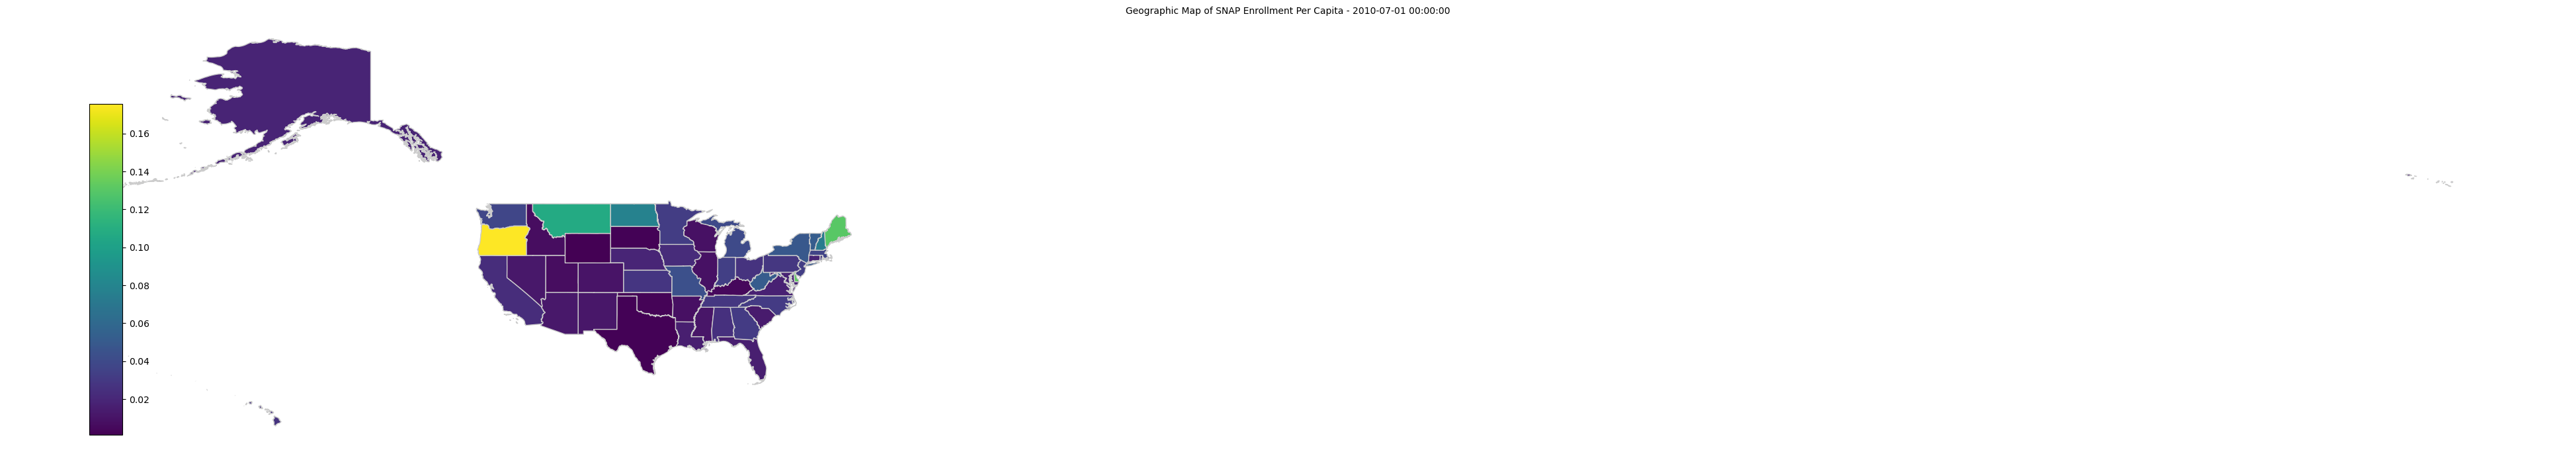

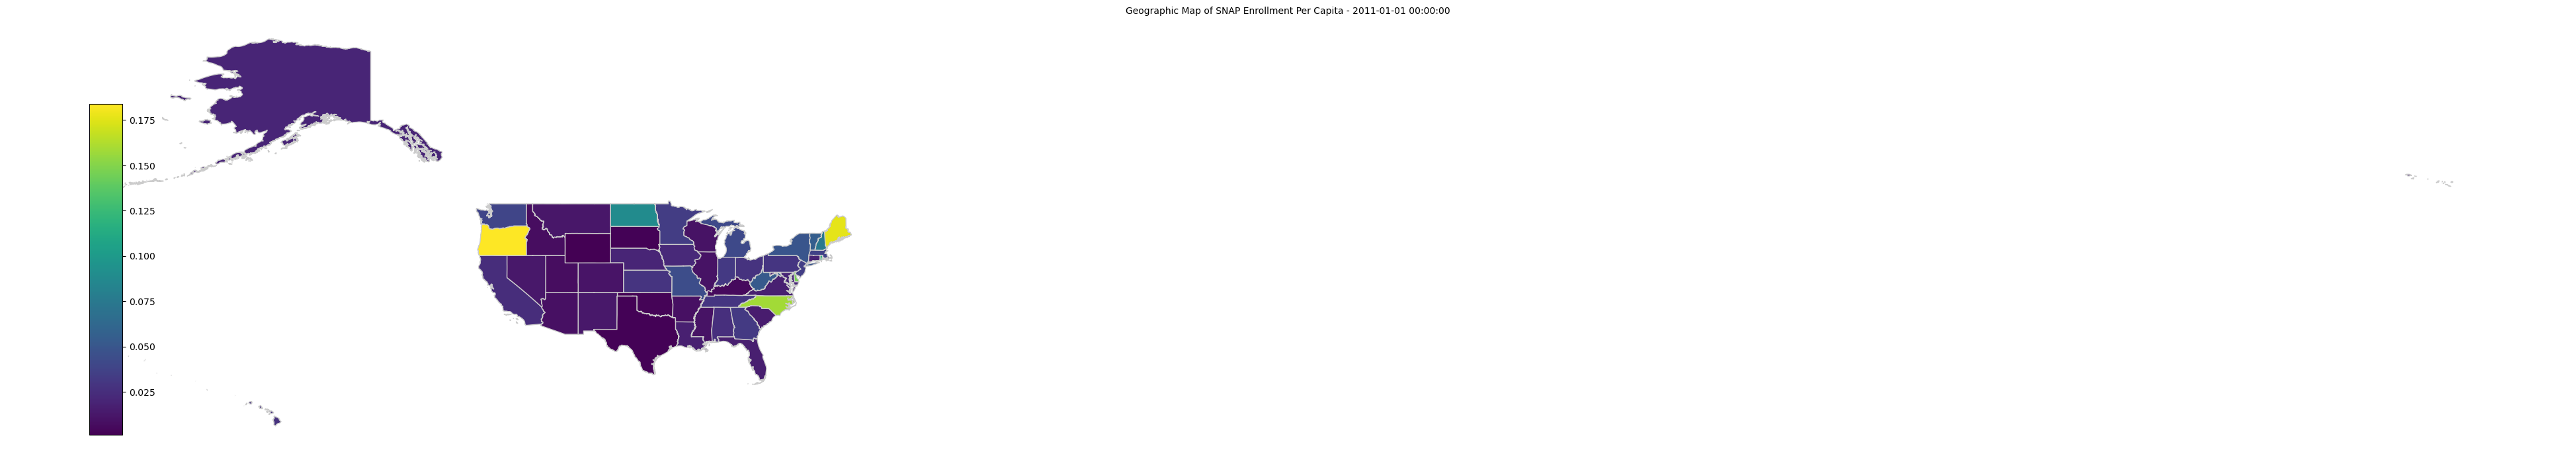

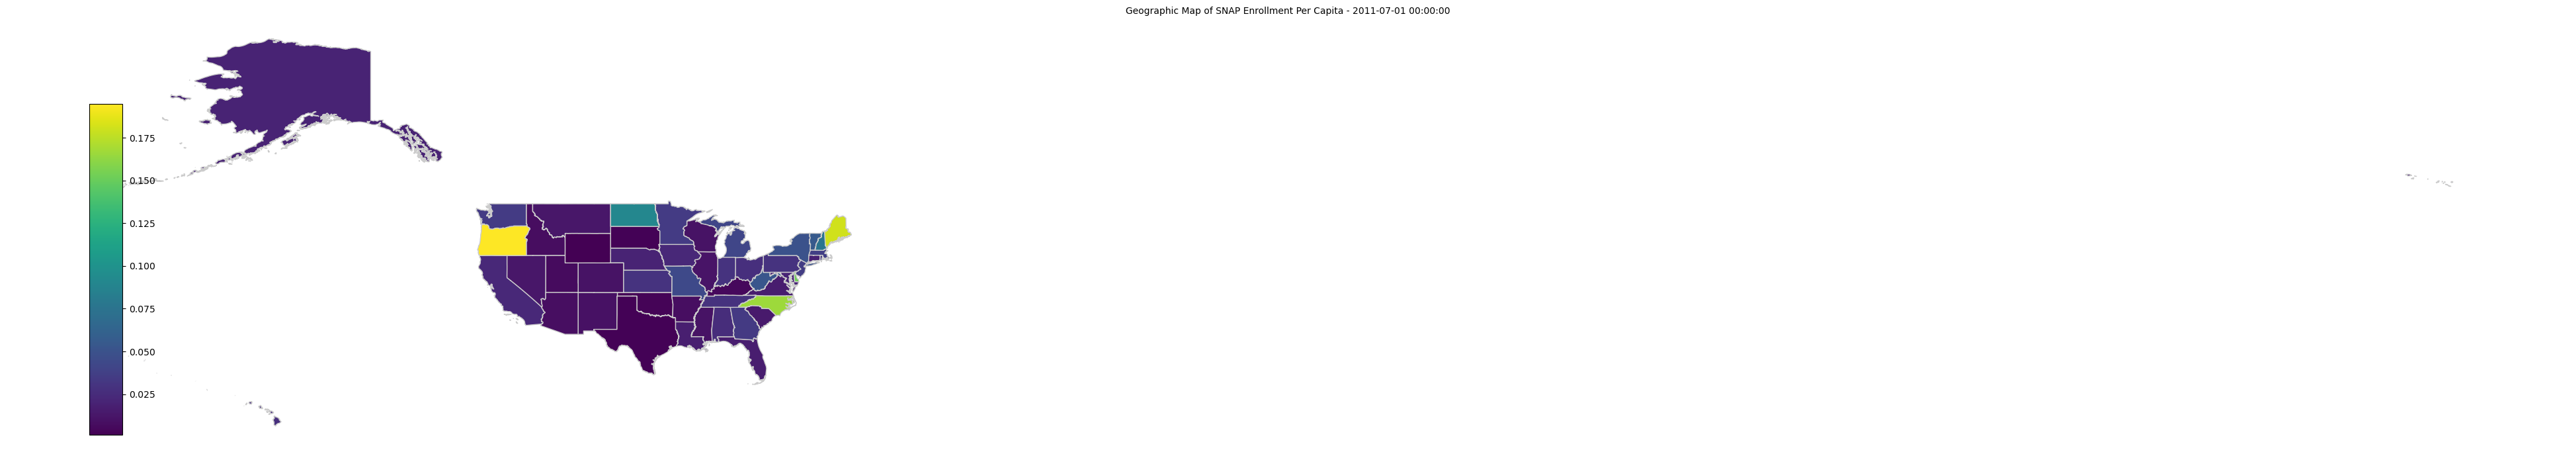

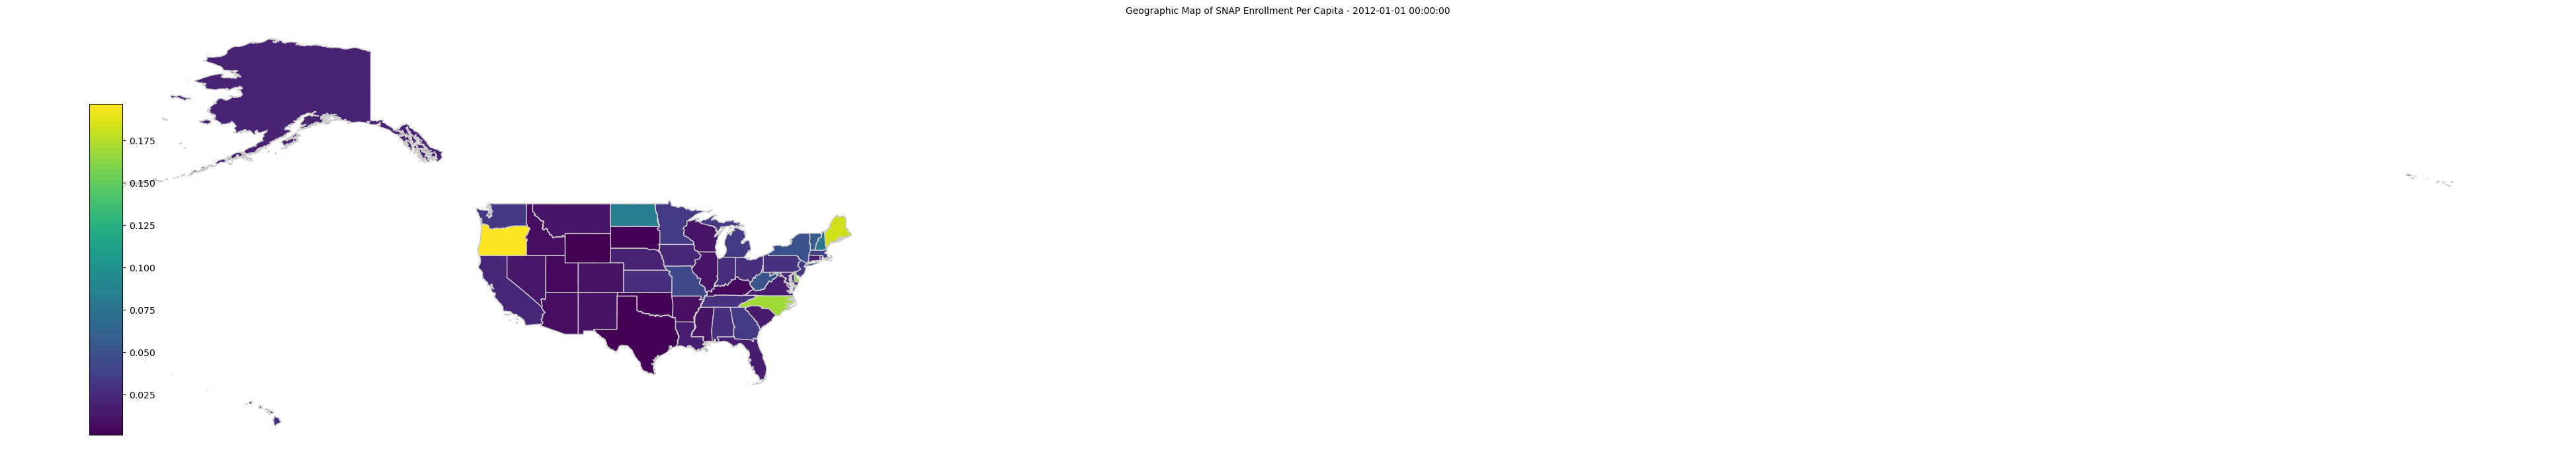

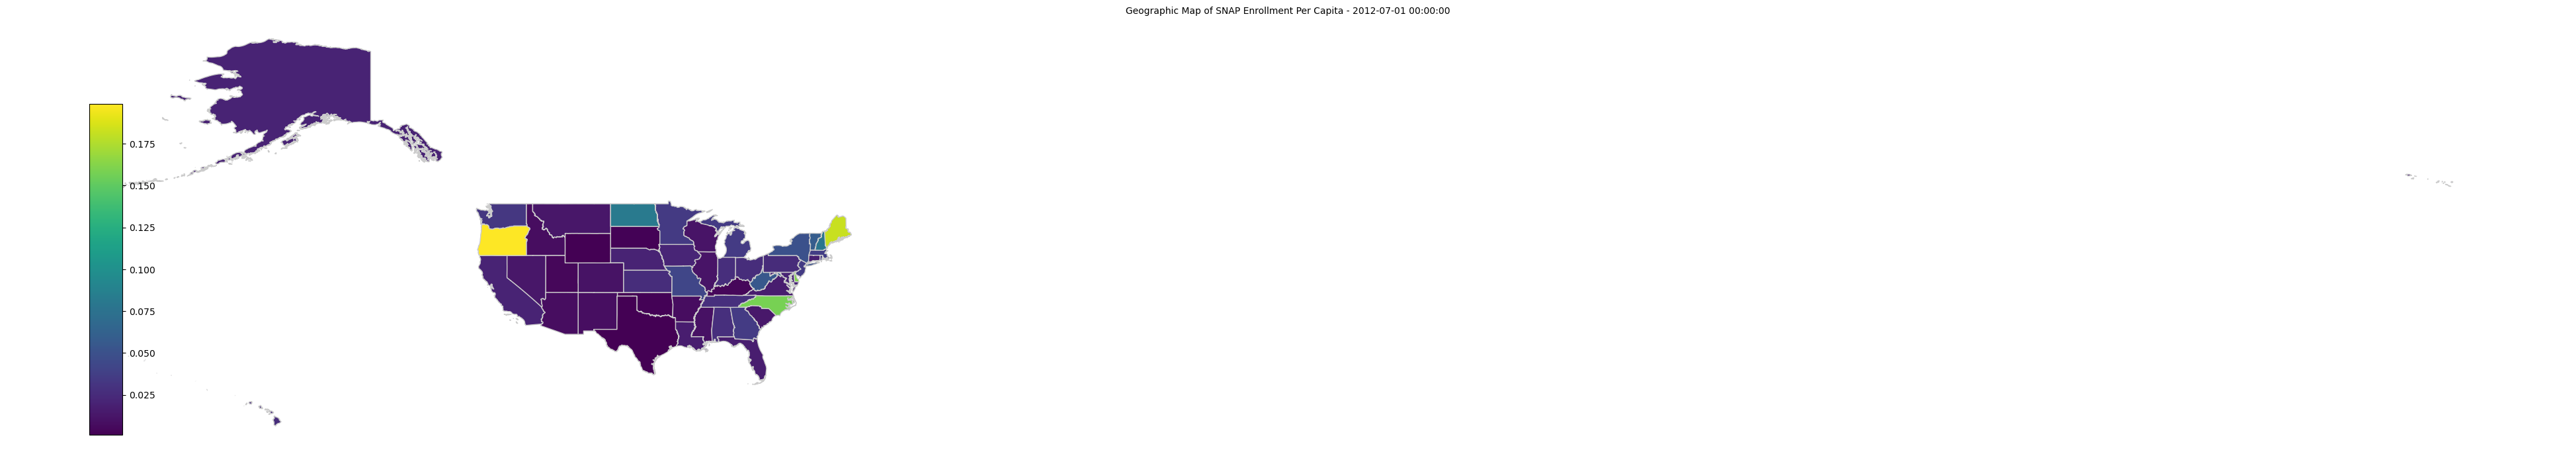

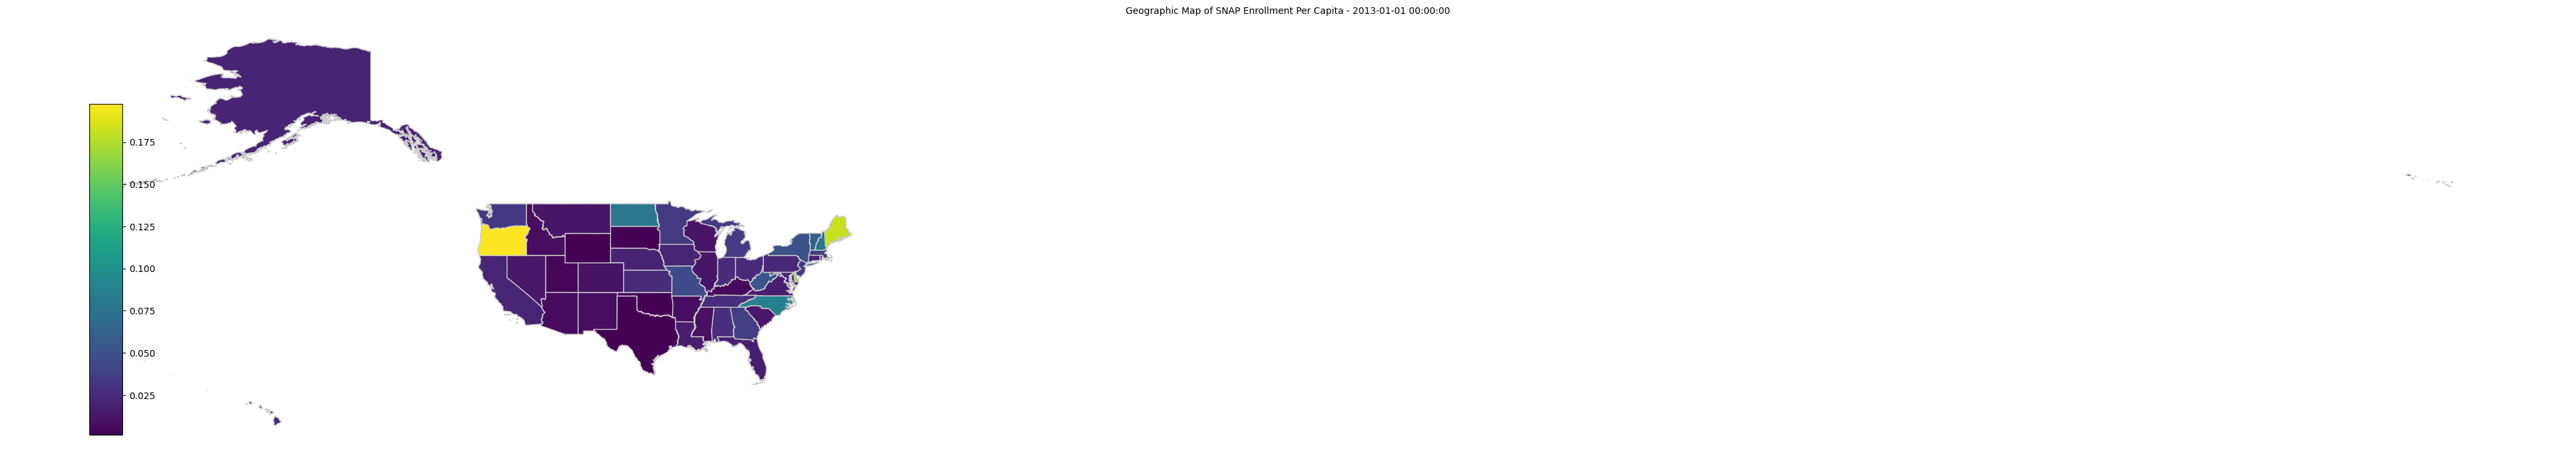

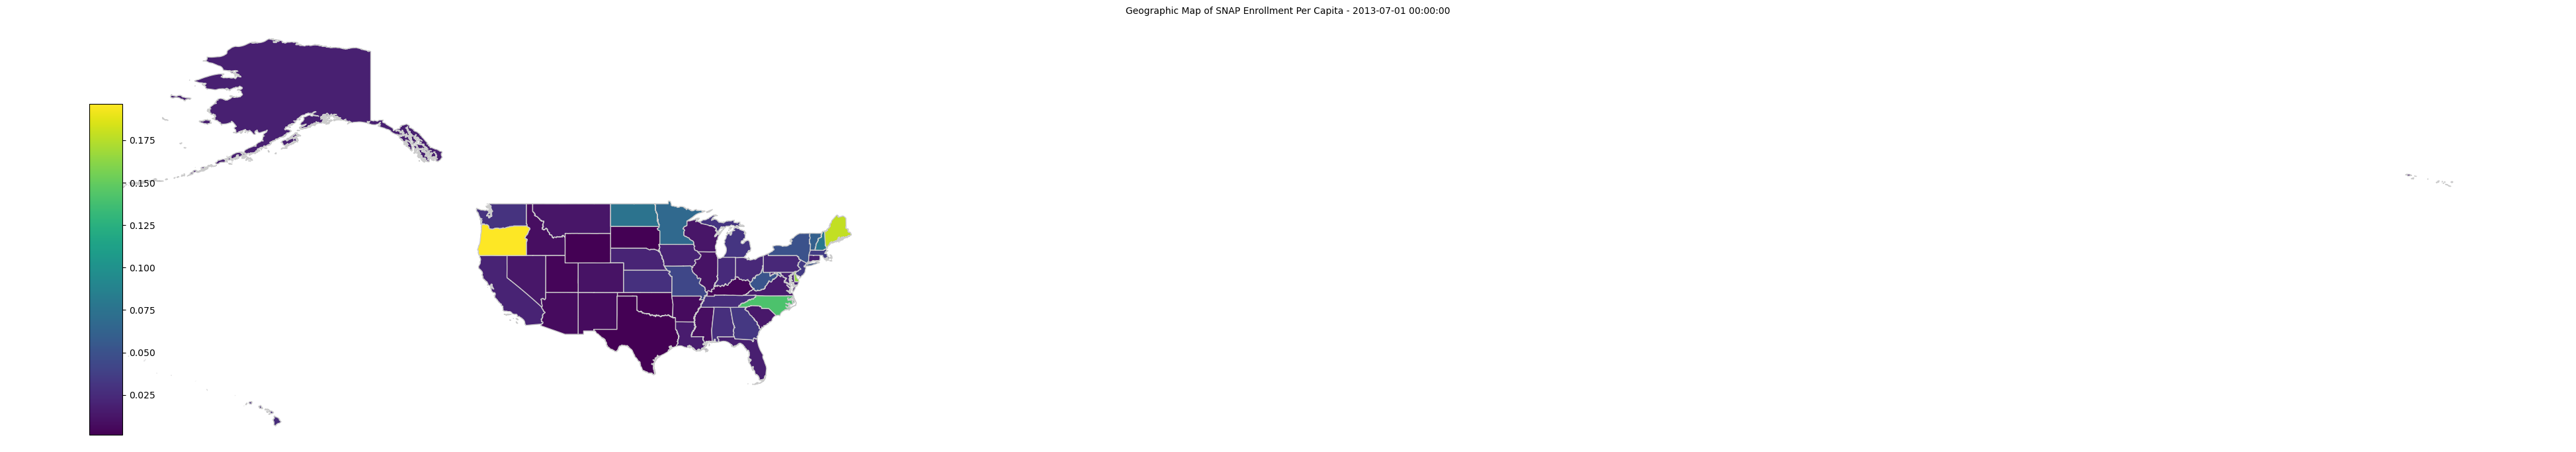

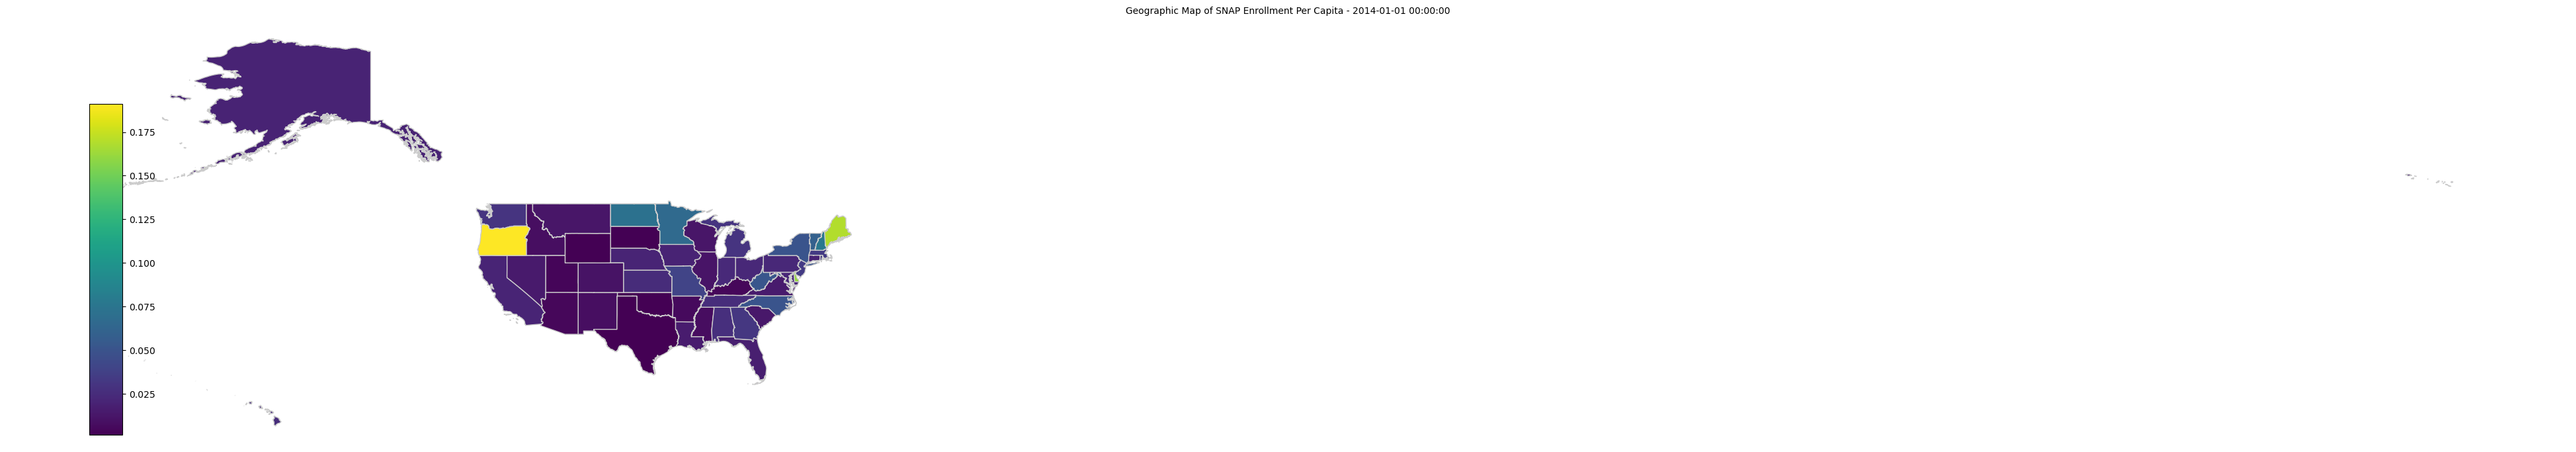

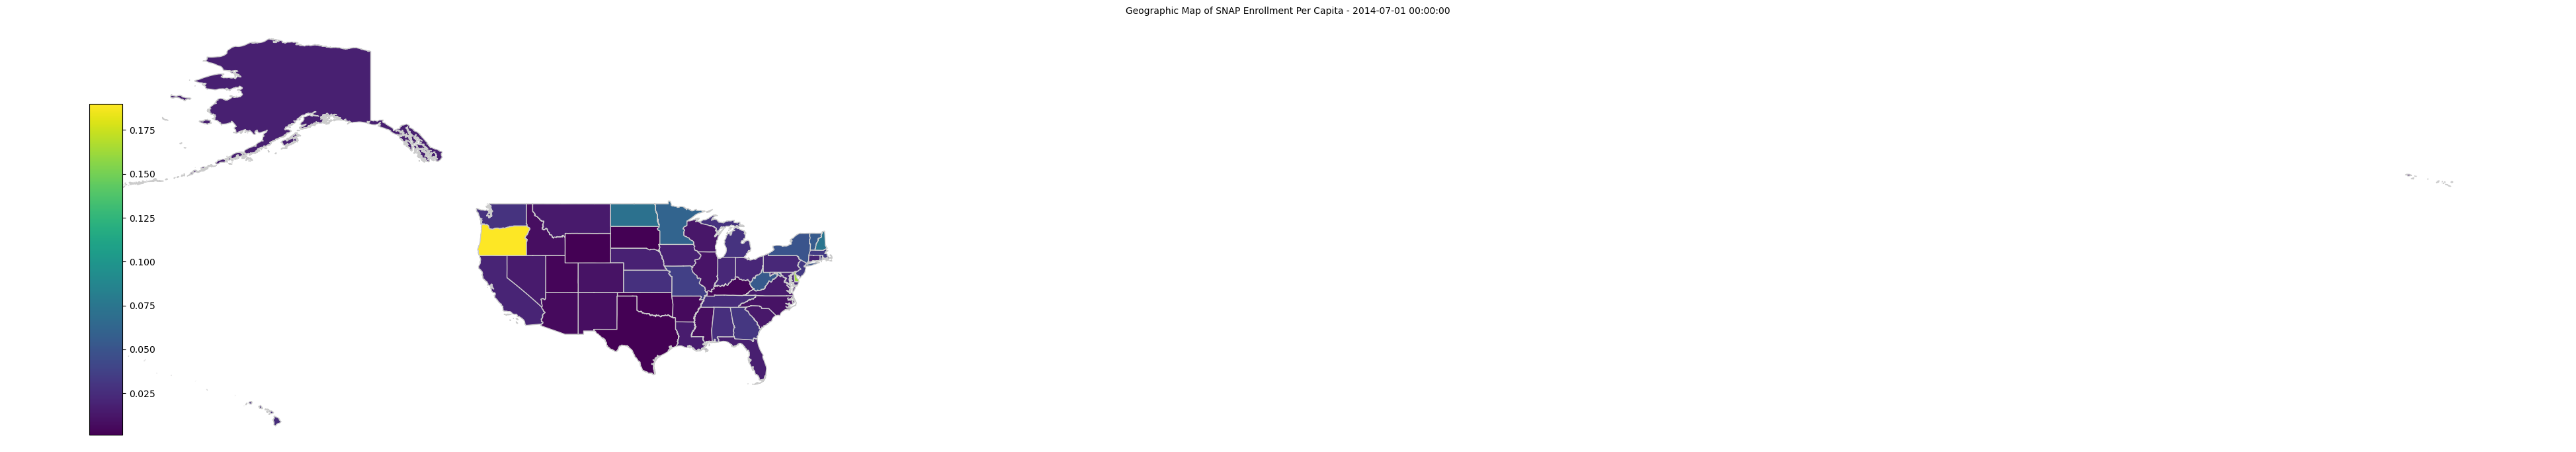

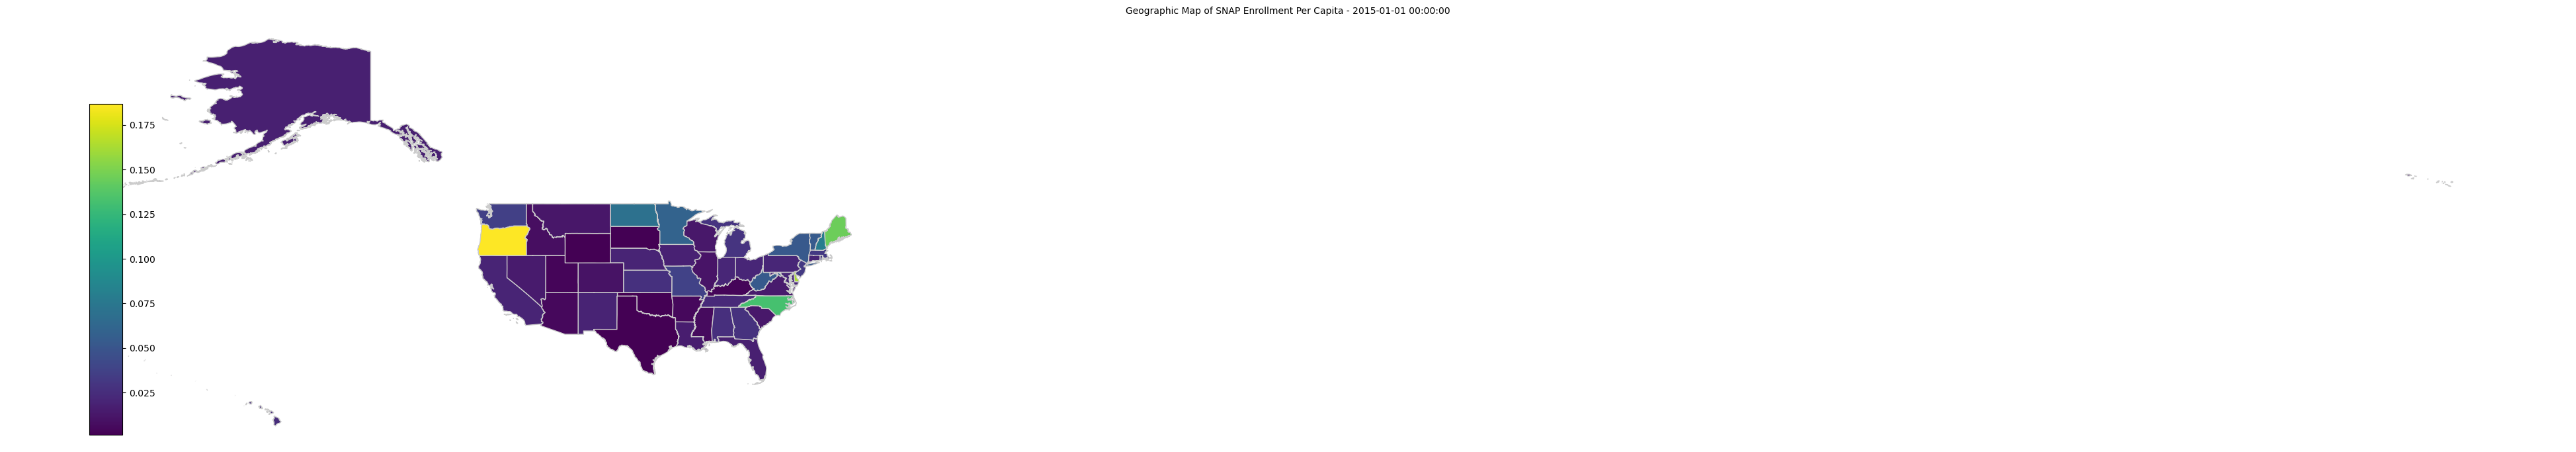

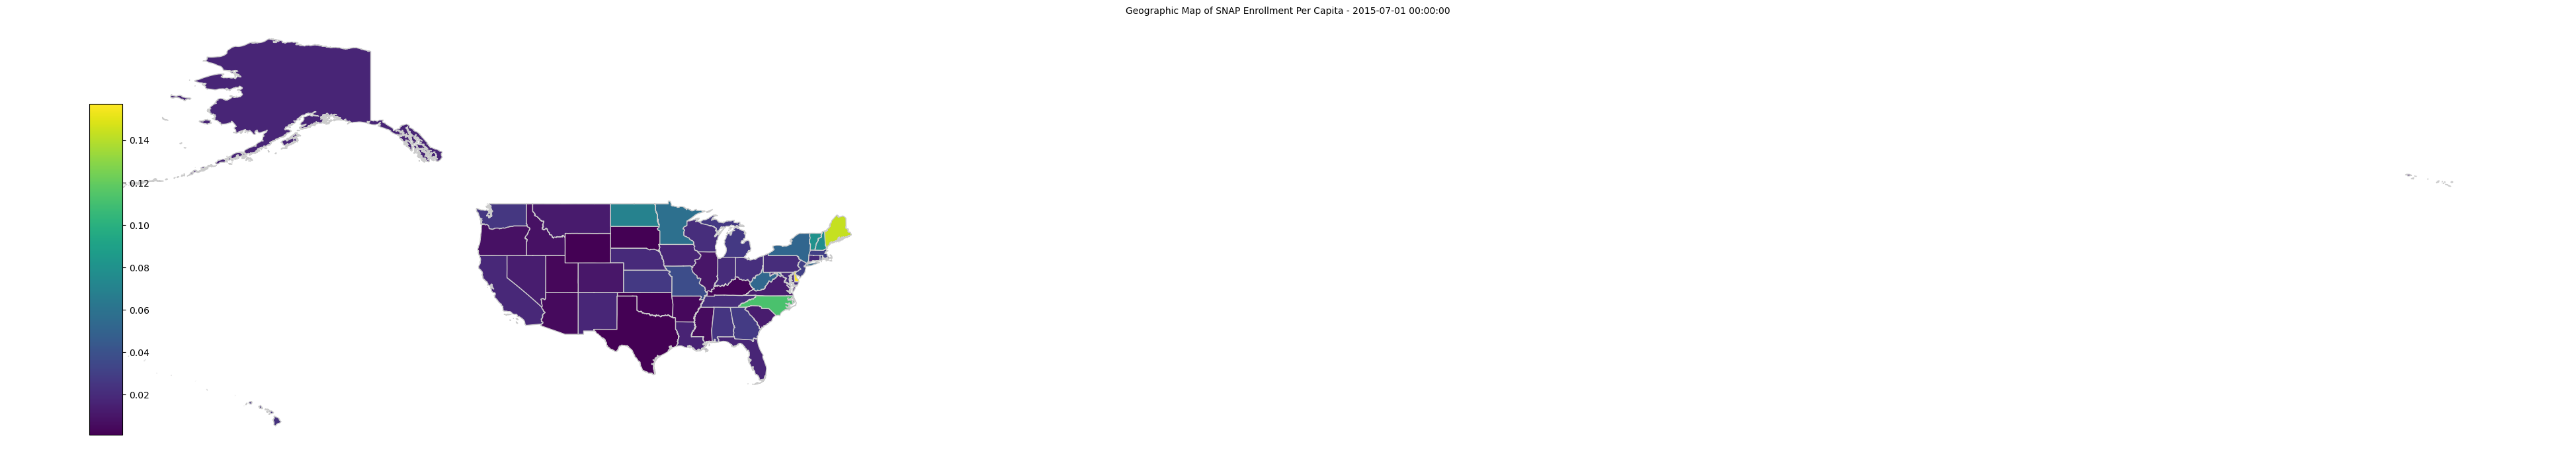

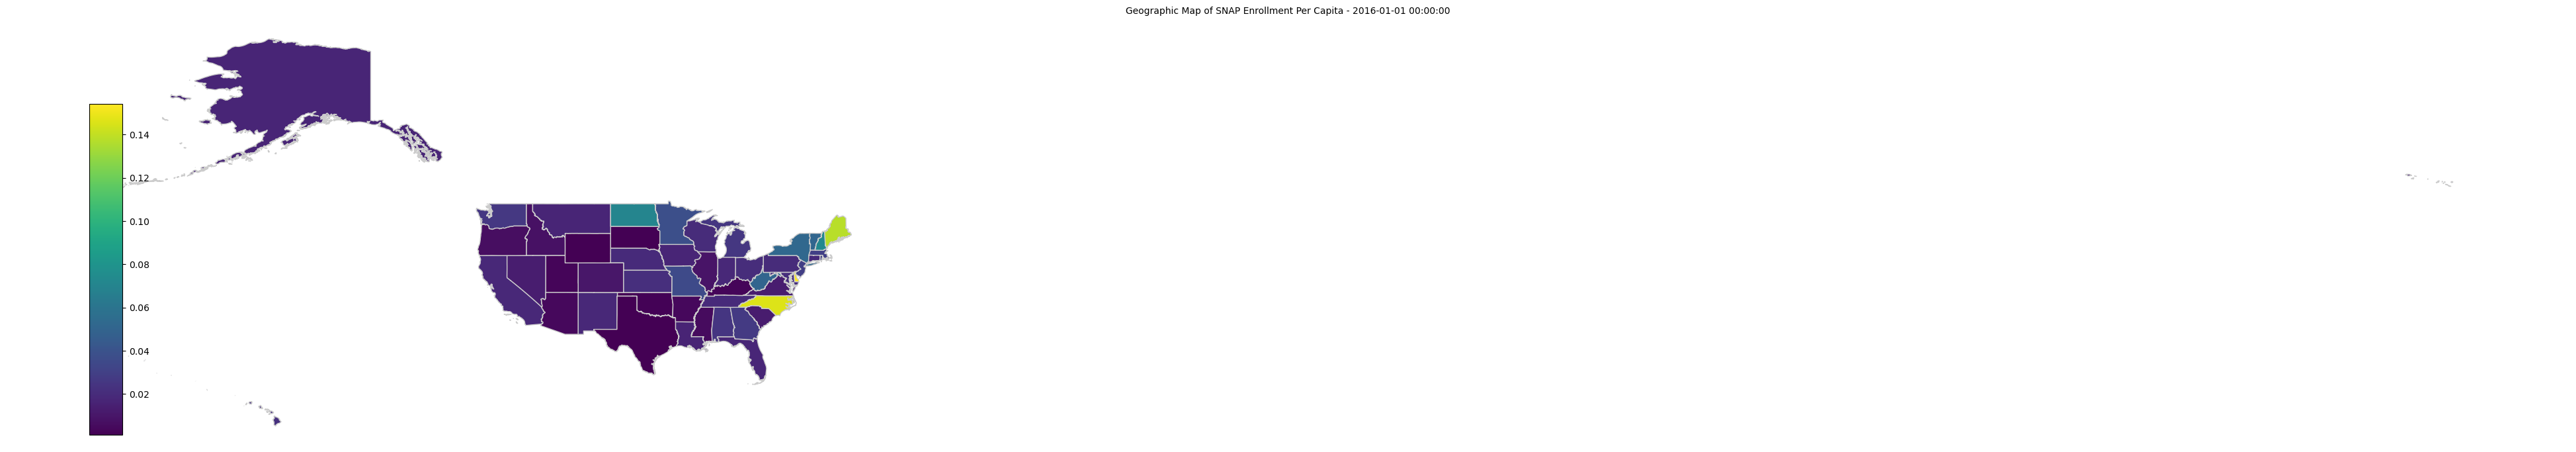

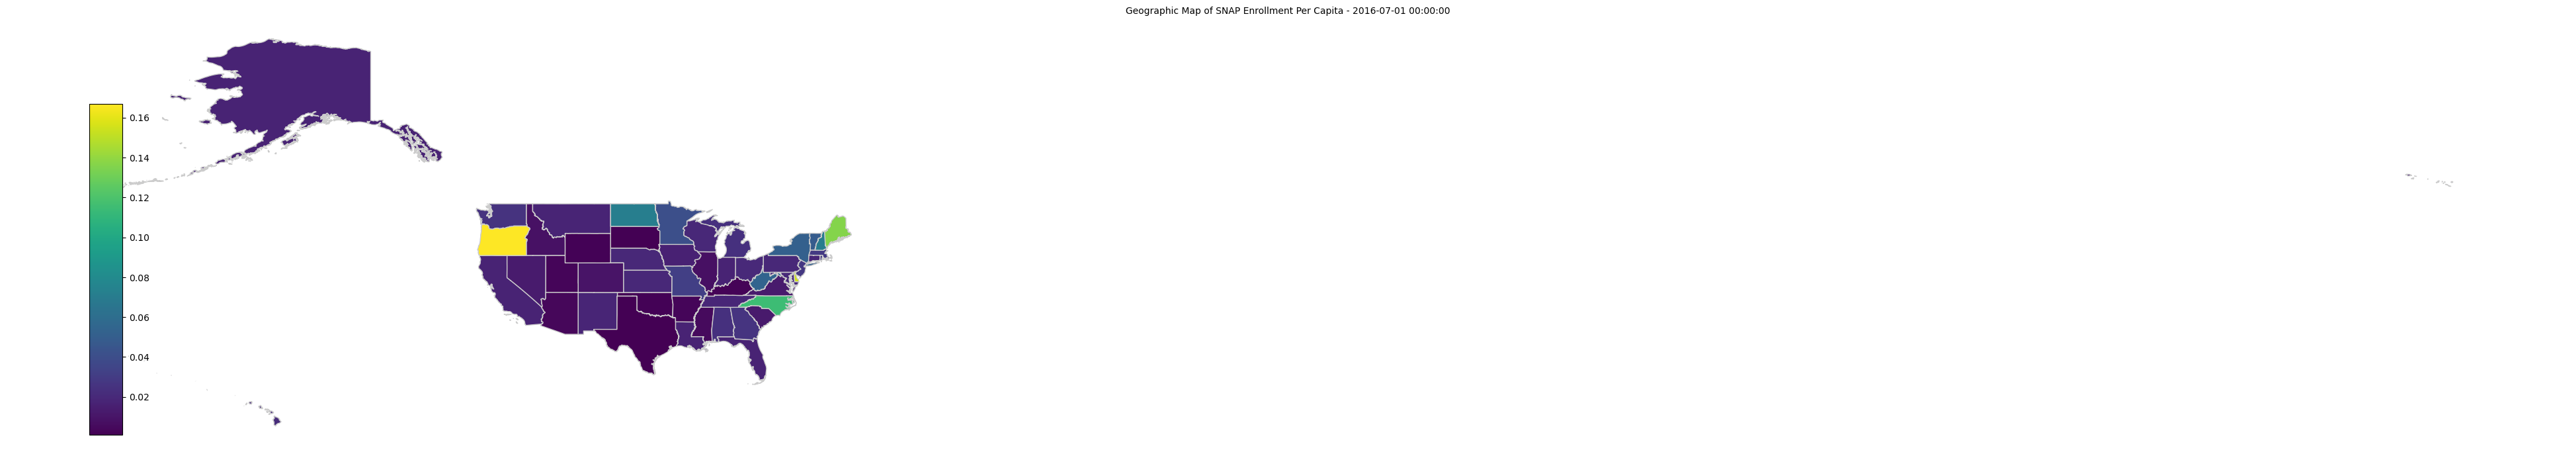

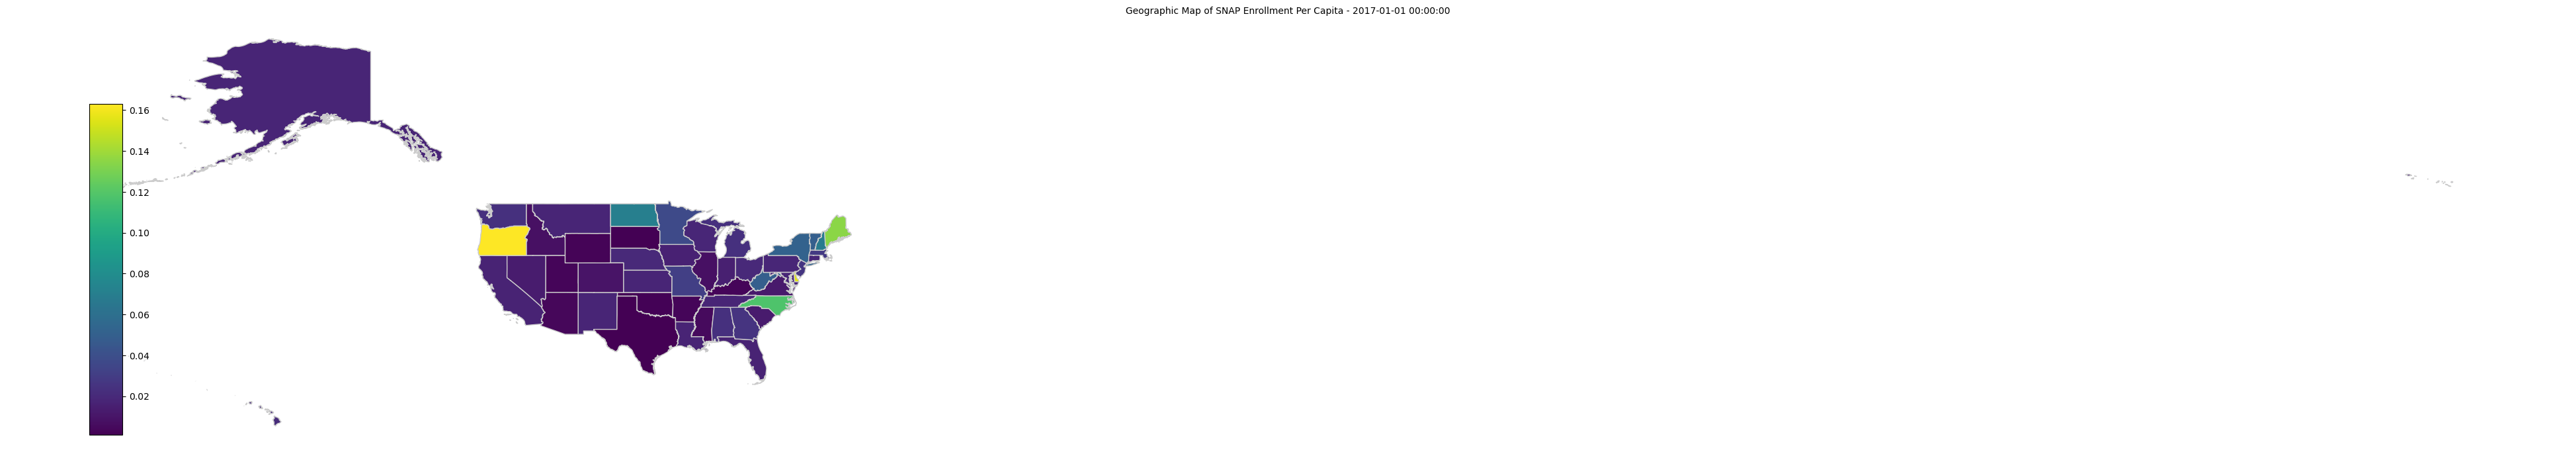

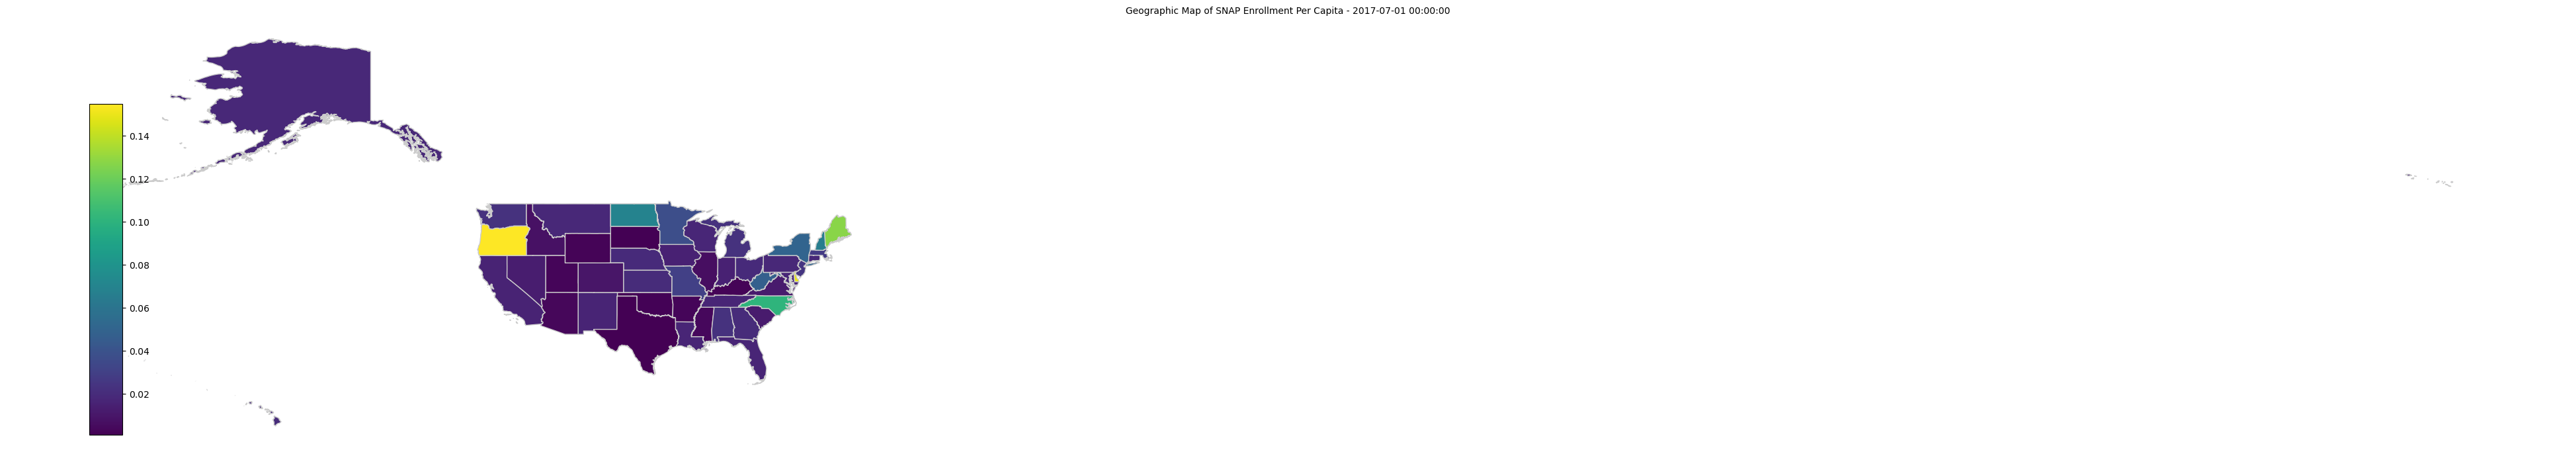

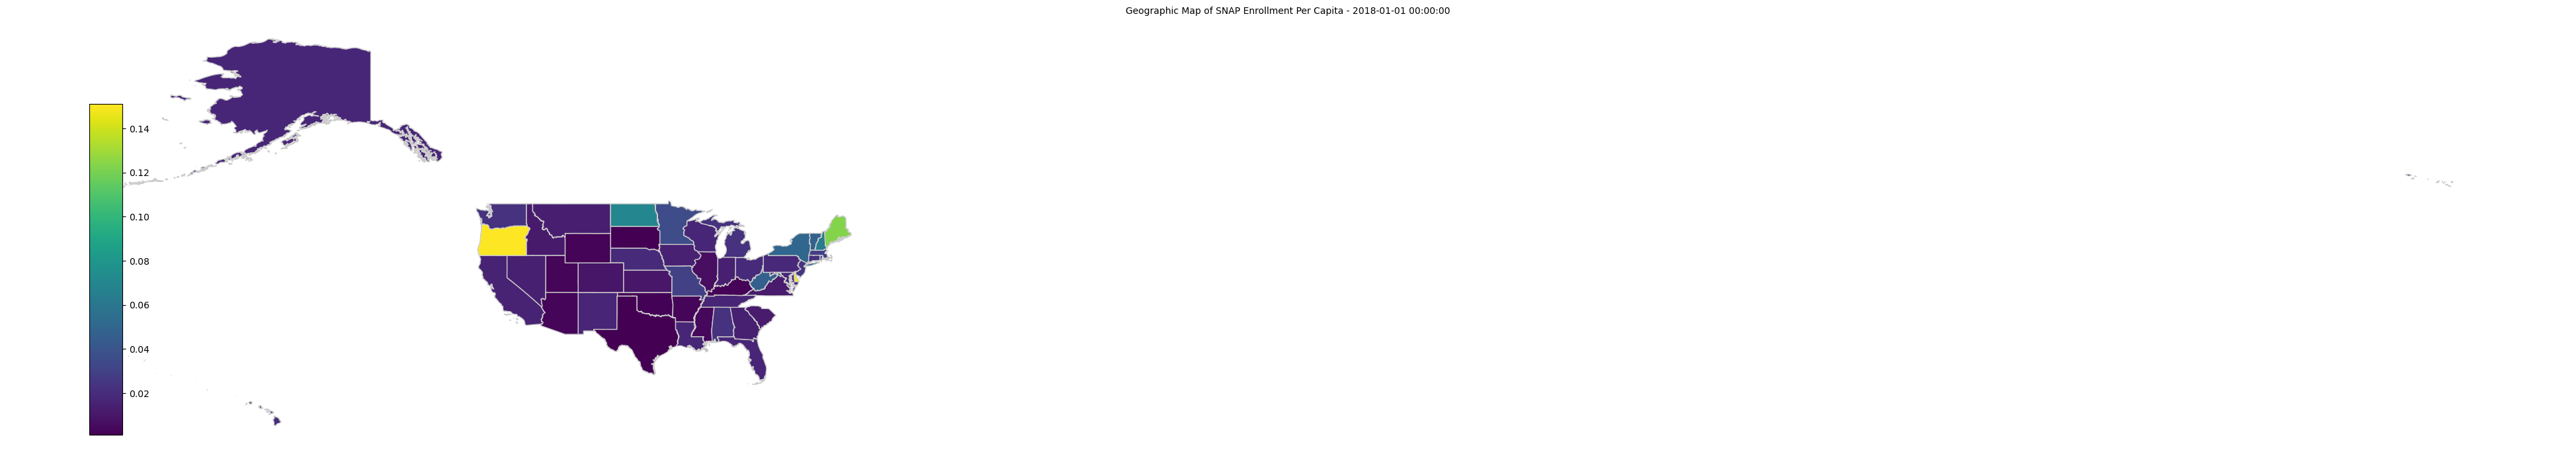

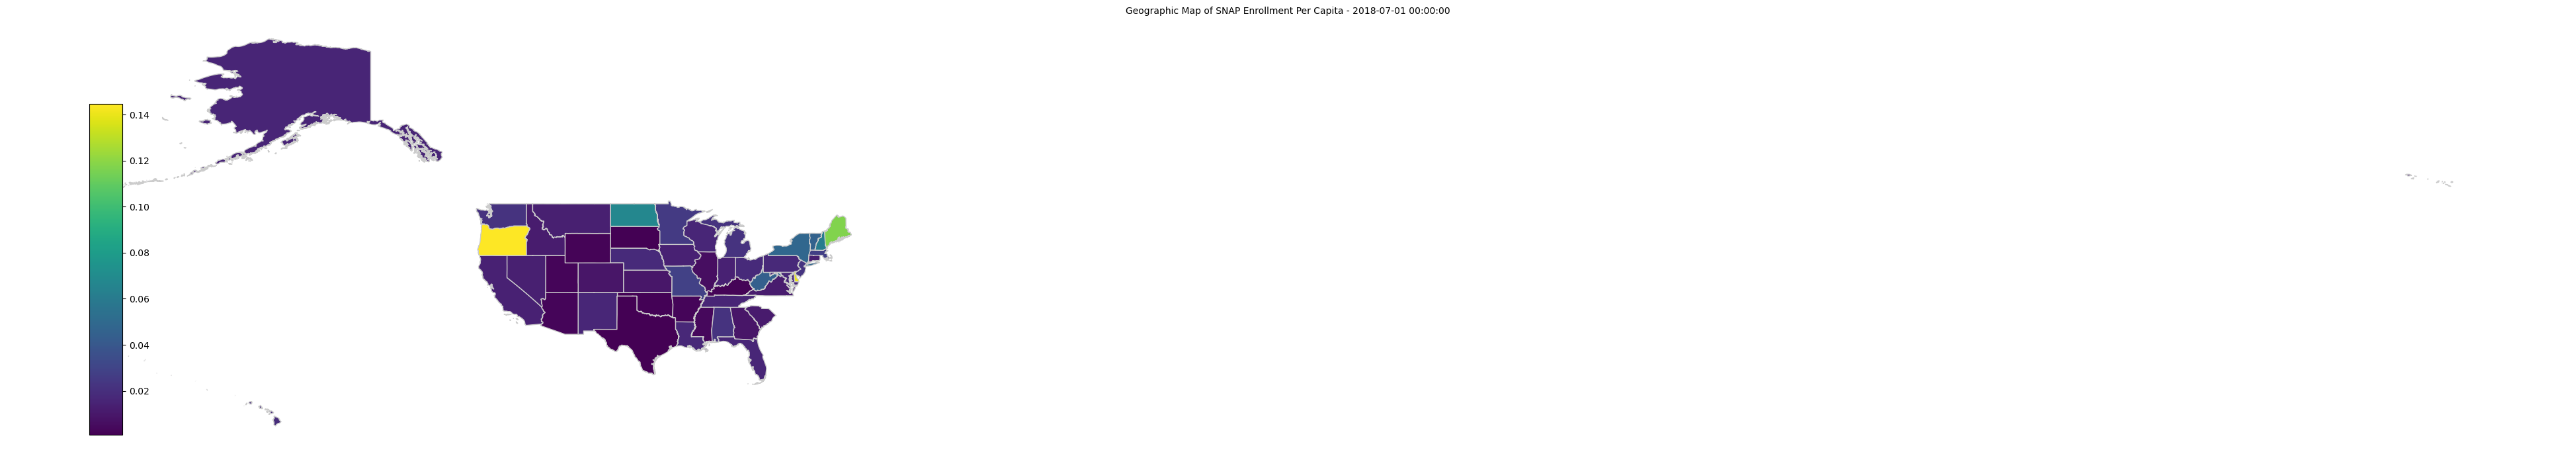

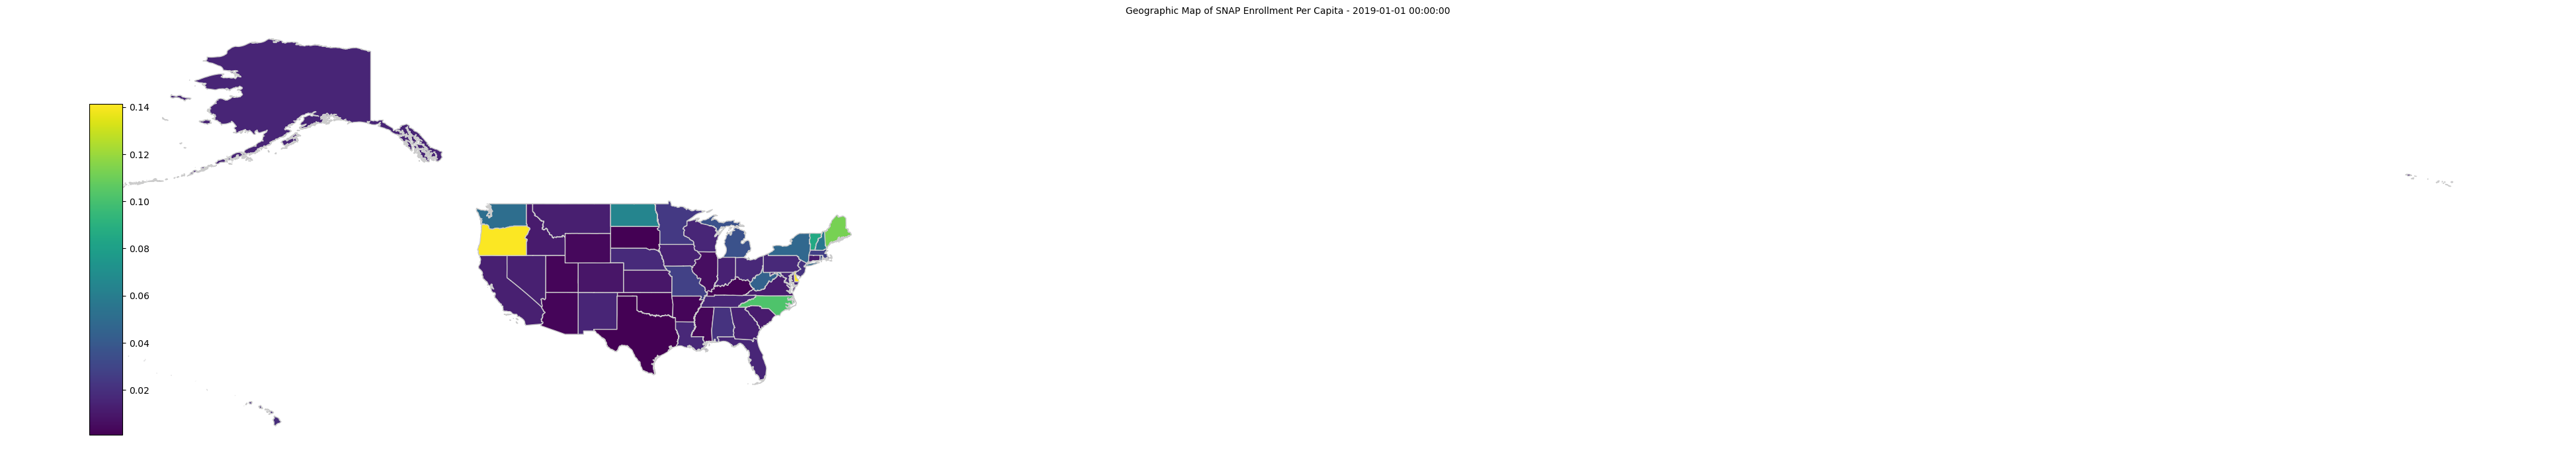

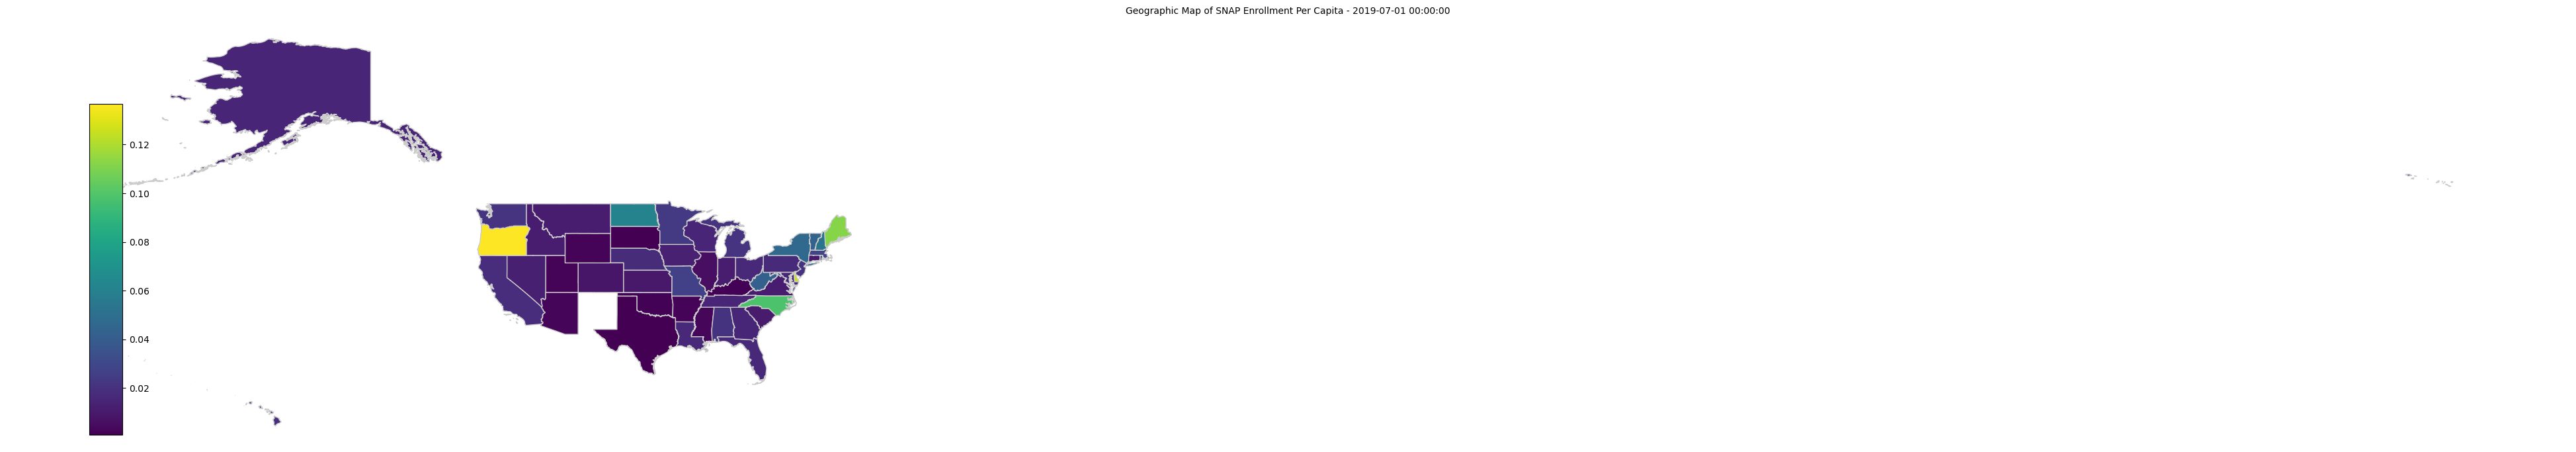

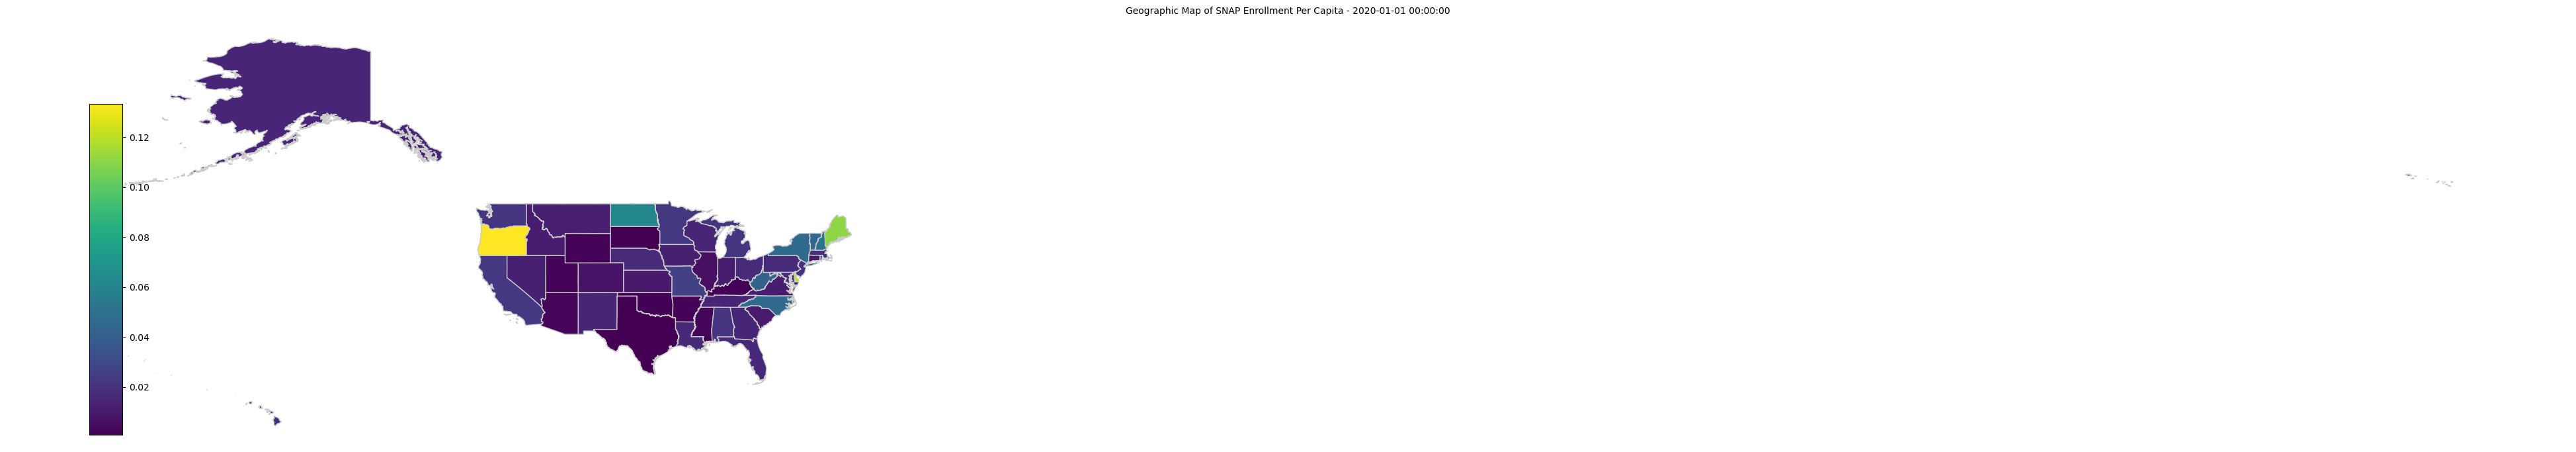

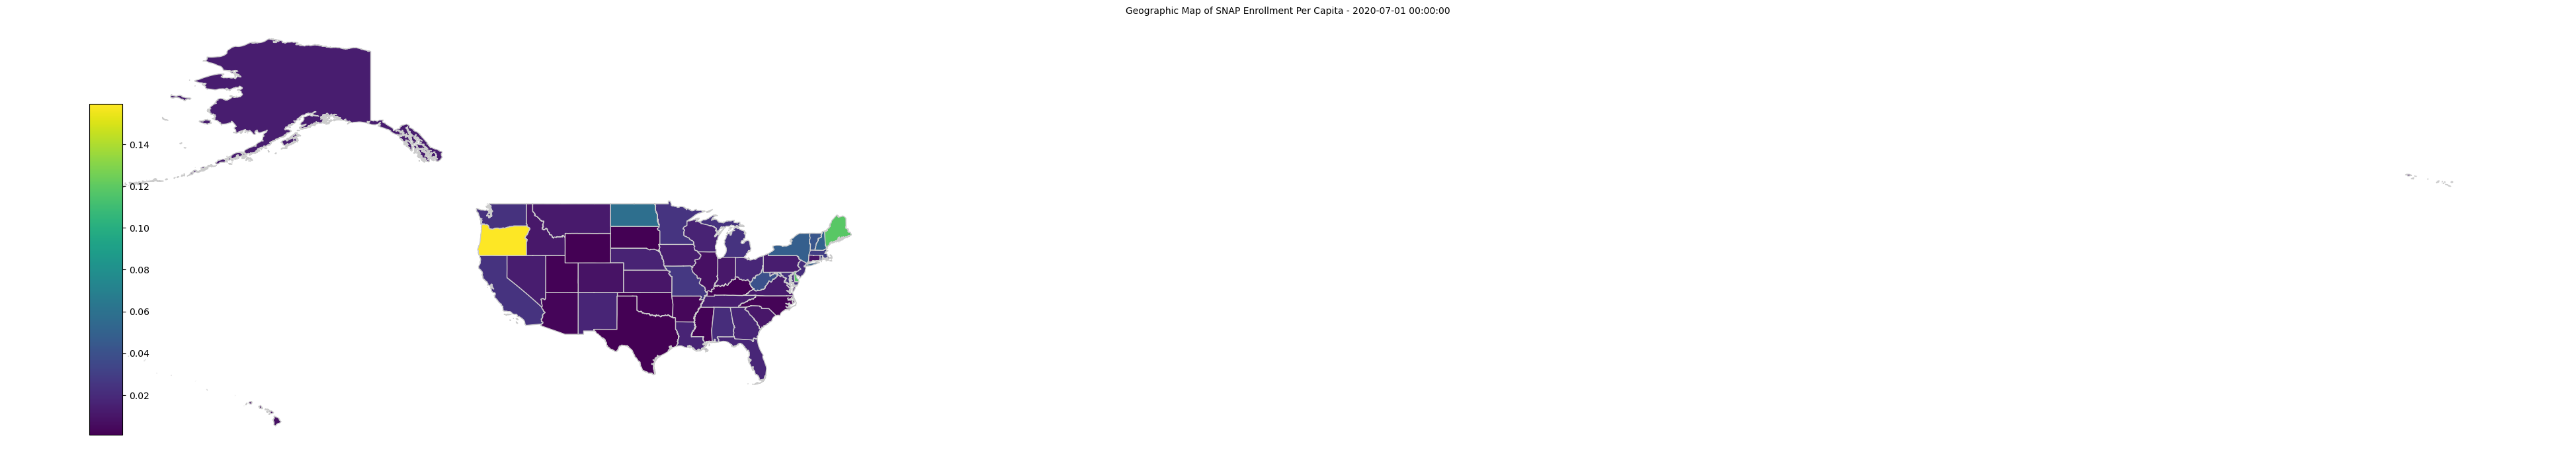

In [515]:
# Set the range for the choropleth
toVisualize = 'snapPerCapita'
newDate = []

for date in dates:
    if date.year > 1999 and date.year < 2021: 
        newDate.append(date)

for date in newDate: 
    AttributeToVisualize = 'SNAP All Persons Public Assistance Participation'    
    heatmapDF = newList[date][['STATE_ID', AttributeToVisualize]][:-1]
    
    heatmapDF = heatmapDF.groupby(by='STATE_ID').sum()
    
    merged_df = pd.merge(left=geo_df, right=heatmapDF, how='left', left_on='STATEFP', right_on='STATE_ID')
    merged_df['STATEFP'] = merged_df['STATEFP'].astype(int)
    merged_df = pd.merge(left=merged_df, right=mergedData[['STATE', 'POPESTIMATE' + str(date.year)]], how='left', left_on='STATEFP', right_on='STATE')
    title = 'Geographic Map of SNAP Enrollment Per Capita - ' + str(date)
    merged_df['snapPerCapita'] = merged_df[AttributeToVisualize].divide(merged_df['POPESTIMATE' + str(date.year)])
    vmin = merged_df[toVisualize].min()
    vmax = merged_df[toVisualize].max()
    cmap = 'viridis'
    matplotlib.rcParams['figure.figsize'] = [50, 12.5]
    # Create figure and axes for Matplotlib
    fig, ax = plt.subplots(1)
    # Remove the axis
    ax.axis('off')
    merged_df.plot(column=toVisualize, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
    # Add a title
    ax.set_title(title, fontdict={'fontsize': '10', 'fontweight': '3'})
                
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
    # Empty array for the data range
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
    cbar = fig.colorbar(sm, cax=cbaxes)